# Cleaning anomalies in time series per region slug



## Load  libraries

In [3]:
# %load first_cell.py
%reload_ext autoreload
%autoreload 2
from pathlib import Path
home = str(Path.home())

import sys
sys.path = sys.path + [f'{home}/.conda/envs/norm_env/lib/python37.zip', 
                       f'{home}/.conda/envs/norm_env/lib/python3.7', 
                       f'{home}/.conda/envs/norm_env/lib/python3.7/lib-dynload', 
                       f'{home}/.conda/envs/norm_env/lib/python3.7/site-packages']
sys.prefix = '/home/soniame/.conda/envs/norm_env'

from paths import RAW_PATH, TREAT_PATH, OUTPUT_PATH, FIGURES_PATH

In [4]:
import pandas as pd

#### Run single

In [89]:
from src.runners.clean import _run_single 

../src/utils.py:159: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.


In [90]:
daily, weekly = _run_single(region_slug='aguascalientes', 
                            anomaly_vote_minimun_s1=1, 
                            anomaly_vote_minimun_s2=1, 
                            c_metric = 'max', 
                            print_report = False, 
                            print_plot = False)

2021-06-03 21:24:05.688 | INFO     | src.runners.clean:_run_single:882 - ... here we go aguascalientes...

2021-06-03 21:24:05.689 | DEBUG    | src.runners.clean:_reading_data:686 - 
        select 
            *,
            date_parse(concat(cast(year as varchar), ' ', cast(month as varchar), ' ', cast(day as varchar)), '%Y %m %e') date
        from spd_sdv_waze_corona.prod_daily_daily_index
        where region_slug in ('aguascalientes')
        
2021-06-03 21:24:08.323 | DEBUG    | src.runners.clean:_c_param:348 - C max: 1.0273899198125596
2021-06-03 21:24:08.350 | DEBUG    | src.runners.clean:_c_param:348 - C max: 1.0273899198125596
2021-06-03 21:24:08.354 | DEBUG    | src.runners.clean:_run_step:812 - ... step start ...
2021-06-03 21:24:08.355 | INFO     | src.runners.clean:_run_step:813 - Target variable: observed 

2021-06-03 21:24:08.356 | DEBUG    | src.runners.clean:_find_anomalies:191 - 
... finding outliers ...
2021-06-03 21:24:08.357 | DEBUG    | src.runners.clean:_valida

2021-06-03 21:24:11.809 | DEBUG    | src.runners.clean:_get_max_date:699 - last update 2021-05-19
2021-06-03 21:24:12.001 | DEBUG    | src.runners.clean:_write_missing:716 - ... writing anomalies file ...
/home/soniame/.conda/envs/IDB-IDB-Invest-Coronavirus-Impact-Dashboard/lib/python3.7/site-packages/plotnine/ggplot.py:848: PlotnineWarning: Filename: /home/soniame/shared/spd-sdv-omitnik-waze/corona/cleaning/figures/plot_aguascalientes.pdf
2021-06-03 21:24:13.551 | INFO     | src.runners.clean:_run_single:937 - ... aguascalientes done ...



In [91]:
#daily[daily.date > '2020-05-19']

In [22]:
import plotnine as p9
p9.theme_set(p9.theme_linedraw()) # default theme

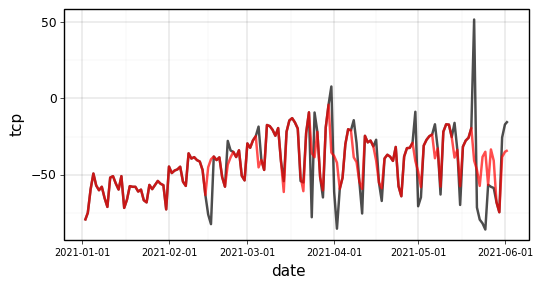

<ggplot: (8774668603213)>

In [24]:
daily.head(3)
gg = (p9.ggplot(daily[daily.date > '2021-01-01'], p9.aes(x = 'date', y='tcp')) 
 + p9.geom_line(size= 1, alpha = .7)
 + p9.geom_line(p9.aes( y='tcp_clean'), color = 'red', size= 1, alpha = .7)
 + p9.theme(figure_size=(6, 3),
            axis_text_x=p9.element_text(size = 7)) )
gg 

In [ ]:
daily.head(3)
gg = (p9.ggplot(daily, p9.aes(x = 'date', y='tcp')) 
 + p9.geom_line(size= 1, alpha = .7)
 + p9.theme(figure_size=(6, 3),
            axis_text_x=p9.element_text(size = 7)) )
gg 

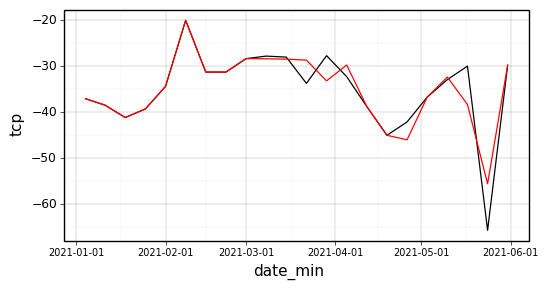

<ggplot: (8774669490341)>

In [18]:
weekly.head(3)
gg = (p9.ggplot(weekly[weekly.date_min > '2021-01-01'], p9.aes(x = 'date_min', y='tcp')) 
 + p9.geom_line() 
 + p9.geom_line(p9.aes( y='tcp_clean'), color = 'red')
 + p9.theme(figure_size=(6, 3),
            axis_text_x=p9.element_text(size = 7)) )
gg

In [ ]:
print(daily.date.min())
print(daily.date.max())
print(weekly.week.max())

#### Run by batch

In [92]:
from src.runners.clean import _run_batch 

In [93]:
_run_batch(athena_path = "/home/soniame/shared/spd-sdv-omitnik-waze/corona", 
          c_metric = 'max',
          f_metric = 20)

2021-06-03 21:25:10.430 | INFO     | src.runners.clean:_run_batch:955 - TO DO regions  81
2021-06-03 21:25:10.431 | INFO     | src.runners.clean:_run_single:882 - ... here we go aguascalientes...

2021-06-03 21:25:10.434 | DEBUG    | src.runners.clean:_reading_data:686 - 
        select 
            *,
            date_parse(concat(cast(year as varchar), ' ', cast(month as varchar), ' ', cast(day as varchar)), '%Y %m %e') date
        from spd_sdv_waze_corona.prod_daily_daily_index
        where region_slug in ('aguascalientes')
        
2021-06-03 21:25:12.976 | DEBUG    | src.runners.clean:_c_param:348 - C max: 1.0273899198125596
2021-06-03 21:25:13.053 | DEBUG    | src.runners.clean:_c_param:348 - C max: 20.547798396251192
2021-06-03 21:25:13.057 | DEBUG    | src.runners.clean:_run_step:812 - ... step start ...
2021-06-03 21:25:13.058 | INFO     | src.runners.clean:_run_step:813 - Target variable: observed 

2021-06-03 21:25:13.058 | DEBUG    | src.runners.clean:_find_anomalies:191 

2021-06-03 21:25:16.526 | DEBUG    | src.runners.clean:_get_max_date:699 - last update 2021-05-19
2021-06-03 21:25:16.718 | DEBUG    | src.runners.clean:_write_missing:716 - ... writing anomalies file ...
/home/soniame/.conda/envs/IDB-IDB-Invest-Coronavirus-Impact-Dashboard/lib/python3.7/site-packages/plotnine/ggplot.py:848: PlotnineWarning: Filename: /home/soniame/shared/spd-sdv-omitnik-waze/corona/cleaning/figures/plot_aguascalientes.pdf
2021-06-03 21:25:18.218 | INFO     | src.runners.clean:_run_single:937 - ... aguascalientes done ...

2021-06-03 21:25:18.220 | INFO     | src.runners.clean:_run_single:882 - ... here we go arequipa...

2021-06-03 21:25:18.223 | DEBUG    | src.runners.clean:_reading_data:686 - 
        select 
            *,
            date_parse(concat(cast(year as varchar), ' ', cast(month as varchar), ' ', cast(day as varchar)), '%Y %m %e') date
        from spd_sdv_waze_corona.prod_daily_daily_index
        where region_slug in ('arequipa')
        
2021-06-03 2

2021-06-03 21:25:21.976 | DEBUG    | src.runners.clean:_impute_anomalies:288 - 
... imputing outliers ...
2021-06-03 21:25:22.024 | INFO     | src.runners.clean:_run_step:832 - Output variable S2_shift
2021-06-03 21:25:22.025 | DEBUG    | src.runners.clean:_shift_level:542 - 

2021-06-03 21:25:22.026 | DEBUG    | src.runners.clean:_shift_level:543 - ... shifting levels for Loess ...
2021-06-03 21:25:22.028 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating Loess...

2021-06-03 21:25:22.034 | DEBUG    | src.runners.clean:_run_shift_grid:398 - ... shift level running grid  ...

2021-06-03 21:25:22.035 | DEBUG    | src.runners.clean:_run_shift_grid:400 - C_LS 27.41559566935559
2021-06-03 21:25:22.681 | DEBUG    | src.runners.clean:_run_shift_grid:420 - Total combinations: 25

2021-06-03 21:25:22.682 | DEBUG    | src.runners.clean:_shift_sum:443 - LS 2020 Start 2020-03-31 - 2020-12-15
2021-06-03 21:25:22.683 | DEBUG    | src.runners.clean:_shift_sum:444 - LS 2021 Start Non

2021-06-03 21:25:30.824 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating S1_shift...

2021-06-03 21:25:30.831 | DEBUG    | src.runners.clean:_c_trun:121 - C truncated: 1.76668667025904
2021-06-03 21:25:30.831 | DEBUG    | src.runners.clean:_anomalies_detector:143 - C_TRUNC 1.76668667025904
../src/runners/clean.py:158: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:159: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
2021-06-03 21:25:30.935 | DEBUG    | src.runners.clean:_find_anomalies:205 - Number of anomalies found: 33

2021-06-03 21:25:30.936 | DEBUG    | src.runners.clean:_find_a

2021-06-03 21:25:37.454 | DEBUG    | src.runners.clean:_run_shift_grid:400 - C_LS 13.502613770130424
2021-06-03 21:25:38.106 | DEBUG    | src.runners.clean:_run_shift_grid:420 - Total combinations: 25

2021-06-03 21:25:38.107 | DEBUG    | src.runners.clean:_shift_sum:443 - LS 2020 Start 2020-03-31 - 2020-12-15
2021-06-03 21:25:38.108 | DEBUG    | src.runners.clean:_shift_sum:444 - LS 2021 Start None - None
2021-06-03 21:25:38.349 | DEBUG    | src.runners.clean:_initial_shift_date:481 - Shift found at NaT
2021-06-03 21:25:38.352 | DEBUG    | src.runners.clean:_shift_ts:514 - 

2021-06-03 21:25:38.353 | DEBUG    | src.runners.clean:_shift_ts:515 - Center point: nan
../src/runners/clean.py:522: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:487: SettingWithCopyWarning: 
A value is try

2021-06-03 21:25:45.066 | DEBUG    | src.runners.clean:_impute_anomalies:288 - 
... imputing outliers ...
2021-06-03 21:25:45.114 | INFO     | src.runners.clean:_run_step:832 - Output variable S1_shift
2021-06-03 21:25:45.115 | DEBUG    | src.runners.clean:_shift_level:542 - 

2021-06-03 21:25:45.117 | DEBUG    | src.runners.clean:_shift_level:543 - ... shifting levels for Loess ...
2021-06-03 21:25:45.120 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating Loess...

2021-06-03 21:25:45.125 | DEBUG    | src.runners.clean:_run_shift_grid:398 - ... shift level running grid  ...

2021-06-03 21:25:45.126 | DEBUG    | src.runners.clean:_run_shift_grid:400 - C_LS 15.864537607990838
2021-06-03 21:25:45.776 | DEBUG    | src.runners.clean:_run_shift_grid:420 - Total combinations: 25

2021-06-03 21:25:45.777 | DEBUG    | src.runners.clean:_shift_sum:443 - LS 2020 Start 2020-03-31 - 2020-12-15
2021-06-03 21:25:45.780 | DEBUG    | src.runners.clean:_shift_sum:444 - LS 2021 Start No

2021-06-03 21:25:52.824 | DEBUG    | src.runners.clean:_find_anomalies:206 - [Timestamp('2020-08-18 00:00:00'), Timestamp('2020-08-19 00:00:00'), Timestamp('2020-08-20 00:00:00'), Timestamp('2020-08-21 00:00:00'), Timestamp('2020-08-22 00:00:00'), Timestamp('2020-08-23 00:00:00'), Timestamp('2020-08-24 00:00:00'), Timestamp('2020-08-26 00:00:00'), Timestamp('2020-11-25 00:00:00'), Timestamp('2020-11-28 00:00:00'), Timestamp('2020-12-02 00:00:00'), Timestamp('2020-12-08 00:00:00'), Timestamp('2021-01-30 00:00:00'), Timestamp('2021-03-22 00:00:00'), Timestamp('2021-03-29 00:00:00'), Timestamp('2021-04-01 00:00:00'), Timestamp('2021-04-02 00:00:00'), Timestamp('2021-04-03 00:00:00'), Timestamp('2021-04-08 00:00:00'), Timestamp('2021-04-09 00:00:00'), Timestamp('2021-04-10 00:00:00'), Timestamp('2021-04-11 00:00:00'), Timestamp('2021-04-12 00:00:00'), Timestamp('2021-04-16 00:00:00'), Timestamp('2021-04-19 00:00:00'), Timestamp('2021-04-24 00:00:00'), Timestamp('2021-04-25 00:00:00'), Time

../src/runners/clean.py:158: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:159: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
2021-06-03 21:26:00.173 | DEBUG    | src.runners.clean:_find_anomalies:205 - Number of anomalies found: 29

2021-06-03 21:26:00.174 | DEBUG    | src.runners.clean:_find_anomalies:206 - [Timestamp('2020-08-18 00:00:00'), Timestamp('2020-08-19 00:00:00'), Timestamp('2020-08-20 00:00:00'), Timestamp('2020-08-21 00:00:00'), Timestamp('2020-08-22 00:00:00'), Timestamp('2020-08-23 00:00:00'), Timestamp('2020-08-24 00:00:00'), Timestamp('2020-08-25 00:00:00'), Timestamp('2020-08-26 

2021-06-03 21:26:06.248 | INFO     | src.runners.clean:_run_single:882 - ... here we go bucaramanga...

2021-06-03 21:26:06.248 | DEBUG    | src.runners.clean:_reading_data:686 - 
        select 
            *,
            date_parse(concat(cast(year as varchar), ' ', cast(month as varchar), ' ', cast(day as varchar)), '%Y %m %e') date
        from spd_sdv_waze_corona.prod_daily_daily_index
        where region_slug in ('bucaramanga')
        
2021-06-03 21:26:08.907 | DEBUG    | src.runners.clean:_c_param:348 - C max: 1.6872269818077374
2021-06-03 21:26:08.926 | DEBUG    | src.runners.clean:_c_param:348 - C max: 33.74453963615475
2021-06-03 21:26:08.929 | DEBUG    | src.runners.clean:_run_step:812 - ... step start ...
2021-06-03 21:26:08.930 | INFO     | src.runners.clean:_run_step:813 - Target variable: observed 

2021-06-03 21:26:08.932 | DEBUG    | src.runners.clean:_find_anomalies:191 - 
... finding outliers ...
2021-06-03 21:26:08.933 | DEBUG    | src.runners.clean:_validate_seri

2021-06-03 21:26:11.137 | DEBUG    | src.runners.clean:_initial_shift_date:481 - Shift found at NaT
2021-06-03 21:26:11.141 | DEBUG    | src.runners.clean:_shift_ts:514 - 

2021-06-03 21:26:11.141 | DEBUG    | src.runners.clean:_shift_ts:515 - Center point: nan
../src/runners/clean.py:522: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:487: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
2021-06-03 21:26:11.182 | DEBUG    | src.runners.clean:_run_step:865 - ... step done ...
2021-06-03 21:26:13.440 | DEBUG    | src.runners.clean:_get_max_date:699 - last update 2021-05-19
2021-06-03 21:26:13.636 | DEBUG

2021-06-03 21:26:19.563 | DEBUG    | src.runners.clean:_impute_anomalies:288 - 
... imputing outliers ...
2021-06-03 21:26:19.611 | INFO     | src.runners.clean:_run_step:832 - Output variable S2_shift
2021-06-03 21:26:19.612 | DEBUG    | src.runners.clean:_shift_level:542 - 

2021-06-03 21:26:19.612 | DEBUG    | src.runners.clean:_shift_level:543 - ... shifting levels for Loess ...
2021-06-03 21:26:19.615 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating Loess...

2021-06-03 21:26:19.620 | DEBUG    | src.runners.clean:_run_shift_grid:398 - ... shift level running grid  ...

2021-06-03 21:26:19.621 | DEBUG    | src.runners.clean:_run_shift_grid:400 - C_LS 18.196996090169954
2021-06-03 21:26:20.276 | DEBUG    | src.runners.clean:_run_shift_grid:420 - Total combinations: 25

2021-06-03 21:26:20.277 | DEBUG    | src.runners.clean:_shift_sum:443 - LS 2020 Start 2020-03-31 - 2020-12-15
2021-06-03 21:26:20.278 | DEBUG    | src.runners.clean:_shift_sum:444 - LS 2021 Start No

2021-06-03 21:26:27.231 | DEBUG    | src.runners.clean:_find_anomalies:206 - [Timestamp('2020-11-20 00:00:00'), Timestamp('2020-12-09 00:00:00'), Timestamp('2021-01-18 00:00:00'), Timestamp('2021-01-22 00:00:00'), Timestamp('2021-01-23 00:00:00'), Timestamp('2021-03-08 00:00:00'), Timestamp('2021-03-14 00:00:00'), Timestamp('2021-03-18 00:00:00'), Timestamp('2021-03-21 00:00:00'), Timestamp('2021-03-22 00:00:00'), Timestamp('2021-03-28 00:00:00'), Timestamp('2021-04-02 00:00:00'), Timestamp('2021-04-03 00:00:00'), Timestamp('2021-04-16 00:00:00'), Timestamp('2021-04-18 00:00:00'), Timestamp('2021-04-23 00:00:00'), Timestamp('2021-04-25 00:00:00'), Timestamp('2021-04-29 00:00:00'), Timestamp('2021-05-01 00:00:00'), Timestamp('2021-05-03 00:00:00'), Timestamp('2021-05-05 00:00:00'), Timestamp('2021-05-06 00:00:00'), Timestamp('2021-05-24 00:00:00'), Timestamp('2021-05-28 00:00:00')]
2021-06-03 21:26:27.234 | DEBUG    | src.runners.clean:_impute_anomalies:288 - 
... imputing outliers ...


2021-06-03 21:26:35.441 | INFO     | src.runners.clean:_run_step:813 - Target variable: S1_shift 

2021-06-03 21:26:35.442 | DEBUG    | src.runners.clean:_find_anomalies:191 - 
... finding outliers ...
2021-06-03 21:26:35.442 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating S1_shift...

2021-06-03 21:26:35.448 | DEBUG    | src.runners.clean:_c_trun:121 - C truncated: 1.5
2021-06-03 21:26:35.449 | DEBUG    | src.runners.clean:_anomalies_detector:143 - C_TRUNC 1.5
../src/runners/clean.py:158: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:159: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

2021-06-03 21:26:41.121 | DEBUG    | src.runners.clean:_shift_level:543 - ... shifting levels for Loess ...
2021-06-03 21:26:41.123 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating Loess...

2021-06-03 21:26:41.129 | DEBUG    | src.runners.clean:_run_shift_grid:398 - ... shift level running grid  ...

2021-06-03 21:26:41.130 | DEBUG    | src.runners.clean:_run_shift_grid:400 - C_LS 31.020611575266784
2021-06-03 21:26:41.775 | DEBUG    | src.runners.clean:_run_shift_grid:420 - Total combinations: 25

2021-06-03 21:26:41.776 | DEBUG    | src.runners.clean:_shift_sum:443 - LS 2020 Start 2020-03-31 - 2020-12-15
2021-06-03 21:26:41.777 | DEBUG    | src.runners.clean:_shift_sum:444 - LS 2021 Start None - None
2021-06-03 21:26:42.052 | DEBUG    | src.runners.clean:_initial_shift_date:481 - Shift found at NaT
2021-06-03 21:26:42.056 | DEBUG    | src.runners.clean:_shift_ts:514 - 

2021-06-03 21:26:42.057 | DEBUG    | src.runners.clean:_shift_ts:515 - Center point: nan
../src

2021-06-03 21:26:49.826 | DEBUG    | src.runners.clean:_find_anomalies:206 - [Timestamp('2020-08-17 00:00:00'), Timestamp('2020-08-18 00:00:00'), Timestamp('2020-08-19 00:00:00'), Timestamp('2020-08-20 00:00:00'), Timestamp('2020-08-21 00:00:00'), Timestamp('2020-08-25 00:00:00'), Timestamp('2020-08-26 00:00:00'), Timestamp('2020-08-27 00:00:00'), Timestamp('2020-08-28 00:00:00'), Timestamp('2020-08-29 00:00:00'), Timestamp('2020-08-30 00:00:00'), Timestamp('2021-03-14 00:00:00'), Timestamp('2021-03-20 00:00:00'), Timestamp('2021-03-21 00:00:00'), Timestamp('2021-03-24 00:00:00'), Timestamp('2021-03-31 00:00:00'), Timestamp('2021-04-02 00:00:00'), Timestamp('2021-04-09 00:00:00'), Timestamp('2021-04-30 00:00:00'), Timestamp('2021-05-09 00:00:00'), Timestamp('2021-05-21 00:00:00')]
2021-06-03 21:26:49.828 | DEBUG    | src.runners.clean:_impute_anomalies:288 - 
... imputing outliers ...
2021-06-03 21:26:49.876 | INFO     | src.runners.clean:_run_step:832 - Output variable S1_shift
2021-0

2021-06-03 21:26:58.812 | DEBUG    | src.runners.clean:_find_anomalies:206 - [Timestamp('2020-08-17 00:00:00'), Timestamp('2020-08-18 00:00:00'), Timestamp('2020-08-19 00:00:00'), Timestamp('2020-08-20 00:00:00'), Timestamp('2020-08-21 00:00:00'), Timestamp('2020-08-25 00:00:00'), Timestamp('2020-08-26 00:00:00'), Timestamp('2020-08-27 00:00:00'), Timestamp('2020-08-28 00:00:00'), Timestamp('2020-08-29 00:00:00'), Timestamp('2020-08-30 00:00:00'), Timestamp('2021-03-21 00:00:00'), Timestamp('2021-03-24 00:00:00'), Timestamp('2021-03-31 00:00:00'), Timestamp('2021-04-11 00:00:00'), Timestamp('2021-04-30 00:00:00'), Timestamp('2021-05-16 00:00:00'), Timestamp('2021-05-21 00:00:00'), Timestamp('2021-05-23 00:00:00'), Timestamp('2021-05-24 00:00:00'), Timestamp('2021-05-25 00:00:00')]
2021-06-03 21:26:58.816 | DEBUG    | src.runners.clean:_impute_anomalies:288 - 
... imputing outliers ...
2021-06-03 21:26:58.864 | INFO     | src.runners.clean:_run_step:832 - Output variable S1_shift
2021-0

2021-06-03 21:27:06.559 | DEBUG    | src.runners.clean:_find_anomalies:206 - [Timestamp('2020-07-31 00:00:00'), Timestamp('2020-08-20 00:00:00'), Timestamp('2020-08-21 00:00:00'), Timestamp('2020-09-30 00:00:00'), Timestamp('2020-10-01 00:00:00'), Timestamp('2020-10-30 00:00:00'), Timestamp('2020-11-20 00:00:00'), Timestamp('2020-11-26 00:00:00'), Timestamp('2020-11-27 00:00:00'), Timestamp('2020-12-01 00:00:00'), Timestamp('2020-12-02 00:00:00'), Timestamp('2020-12-03 00:00:00'), Timestamp('2020-12-04 00:00:00'), Timestamp('2020-12-06 00:00:00'), Timestamp('2020-12-07 00:00:00'), Timestamp('2020-12-13 00:00:00'), Timestamp('2021-01-29 00:00:00'), Timestamp('2021-02-03 00:00:00'), Timestamp('2021-02-05 00:00:00'), Timestamp('2021-02-09 00:00:00'), Timestamp('2021-03-26 00:00:00'), Timestamp('2021-04-01 00:00:00'), Timestamp('2021-04-02 00:00:00'), Timestamp('2021-04-30 00:00:00'), Timestamp('2021-05-28 00:00:00')]
2021-06-03 21:27:06.561 | DEBUG    | src.runners.clean:_impute_anomalies

2021-06-03 21:27:14.558 | DEBUG    | src.runners.clean:_find_anomalies:206 - [Timestamp('2020-04-01 00:00:00'), Timestamp('2020-04-02 00:00:00'), Timestamp('2020-04-03 00:00:00'), Timestamp('2020-04-10 00:00:00'), Timestamp('2020-05-01 00:00:00'), Timestamp('2020-06-10 00:00:00'), Timestamp('2020-06-11 00:00:00'), Timestamp('2020-06-12 00:00:00'), Timestamp('2020-06-13 00:00:00'), Timestamp('2020-06-19 00:00:00'), Timestamp('2020-06-20 00:00:00'), Timestamp('2020-06-24 00:00:00'), Timestamp('2020-07-09 00:00:00'), Timestamp('2020-07-10 00:00:00'), Timestamp('2020-07-11 00:00:00'), Timestamp('2020-07-13 00:00:00'), Timestamp('2020-07-14 00:00:00'), Timestamp('2020-07-15 00:00:00'), Timestamp('2020-08-09 00:00:00'), Timestamp('2020-08-18 00:00:00'), Timestamp('2020-08-19 00:00:00'), Timestamp('2020-08-20 00:00:00'), Timestamp('2020-08-21 00:00:00'), Timestamp('2020-08-22 00:00:00'), Timestamp('2020-08-23 00:00:00'), Timestamp('2020-08-24 00:00:00'), Timestamp('2020-08-25 00:00:00'), Time

2021-06-03 21:27:21.581 | INFO     | src.runners.clean:_run_single:937 - ... country_brazil done ...

2021-06-03 21:27:21.584 | INFO     | src.runners.clean:_run_single:882 - ... here we go country_chile...

2021-06-03 21:27:21.585 | DEBUG    | src.runners.clean:_reading_data:686 - 
        select 
            *,
            date_parse(concat(cast(year as varchar), ' ', cast(month as varchar), ' ', cast(day as varchar)), '%Y %m %e') date
        from spd_sdv_waze_corona.prod_daily_daily_index
        where region_slug in ('country_chile')
        
2021-06-03 21:27:24.574 | DEBUG    | src.runners.clean:_c_param:348 - C max: 4.142744523852838
2021-06-03 21:27:24.594 | DEBUG    | src.runners.clean:_c_param:348 - C max: 82.85489047705676
2021-06-03 21:27:24.598 | DEBUG    | src.runners.clean:_run_step:812 - ... step start ...
2021-06-03 21:27:24.599 | INFO     | src.runners.clean:_run_step:813 - Target variable: observed 

2021-06-03 21:27:24.600 | DEBUG    | src.runners.clean:_find_anomal

2021-06-03 21:27:29.733 | INFO     | src.runners.clean:_run_single:937 - ... country_chile done ...

2021-06-03 21:27:29.737 | INFO     | src.runners.clean:_run_single:882 - ... here we go country_colombia...

2021-06-03 21:27:29.737 | DEBUG    | src.runners.clean:_reading_data:686 - 
        select 
            *,
            date_parse(concat(cast(year as varchar), ' ', cast(month as varchar), ' ', cast(day as varchar)), '%Y %m %e') date
        from spd_sdv_waze_corona.prod_daily_daily_index
        where region_slug in ('country_colombia')
        
2021-06-03 21:27:31.305 | DEBUG    | src.runners.clean:_c_param:348 - C max: 1.691574492443756
2021-06-03 21:27:31.322 | DEBUG    | src.runners.clean:_c_param:348 - C max: 33.831489848875115
2021-06-03 21:27:31.326 | DEBUG    | src.runners.clean:_run_step:812 - ... step start ...
2021-06-03 21:27:31.327 | INFO     | src.runners.clean:_run_step:813 - Target variable: observed 

2021-06-03 21:27:31.327 | DEBUG    | src.runners.clean:_find_

2021-06-03 21:27:34.899 | DEBUG    | src.runners.clean:_get_max_date:699 - last update 2021-05-19
2021-06-03 21:27:35.091 | DEBUG    | src.runners.clean:_write_missing:716 - ... writing anomalies file ...
/home/soniame/.conda/envs/IDB-IDB-Invest-Coronavirus-Impact-Dashboard/lib/python3.7/site-packages/plotnine/ggplot.py:848: PlotnineWarning: Filename: /home/soniame/shared/spd-sdv-omitnik-waze/corona/cleaning/figures/plot_country_colombia.pdf
2021-06-03 21:27:36.575 | INFO     | src.runners.clean:_run_single:937 - ... country_colombia done ...

2021-06-03 21:27:36.577 | INFO     | src.runners.clean:_run_single:882 - ... here we go country_costa_rica...

2021-06-03 21:27:36.578 | DEBUG    | src.runners.clean:_reading_data:686 - 
        select 
            *,
            date_parse(concat(cast(year as varchar), ' ', cast(month as varchar), ' ', cast(day as varchar)), '%Y %m %e') date
        from spd_sdv_waze_corona.prod_daily_daily_index
        where region_slug in ('country_costa_rica

2021-06-03 21:27:41.036 | DEBUG    | src.runners.clean:_run_shift_grid:420 - Total combinations: 25

2021-06-03 21:27:41.037 | DEBUG    | src.runners.clean:_shift_sum:443 - LS 2020 Start 2020-03-31 - 2020-12-15
2021-06-03 21:27:41.037 | DEBUG    | src.runners.clean:_shift_sum:444 - LS 2021 Start None - None
2021-06-03 21:27:41.283 | DEBUG    | src.runners.clean:_initial_shift_date:481 - Shift found at NaT
2021-06-03 21:27:41.287 | DEBUG    | src.runners.clean:_shift_ts:514 - 

2021-06-03 21:27:41.288 | DEBUG    | src.runners.clean:_shift_ts:515 - Center point: nan
../src/runners/clean.py:522: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:487: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pa

2021-06-03 21:27:48.867 | DEBUG    | src.runners.clean:_anomalies_detector:143 - C_TRUNC 1.5
../src/runners/clean.py:158: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:159: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
2021-06-03 21:27:48.970 | DEBUG    | src.runners.clean:_find_anomalies:205 - Number of anomalies found: 43

2021-06-03 21:27:48.971 | DEBUG    | src.runners.clean:_find_anomalies:206 - [Timestamp('2020-08-06 00:00:00'), Timestamp('2020-08-07 00:00:00'), Timestamp('2020-08-09 00:00:00'), Timestamp('2020-08-16 00:00:00'), Timestamp('2020-08-23 00:00:00'), Timestamp('2020-08-30 00:00:00'

2021-06-03 21:27:56.975 | INFO     | src.runners.clean:_run_step:832 - Output variable S1_shift
2021-06-03 21:27:56.976 | DEBUG    | src.runners.clean:_shift_level:542 - 

2021-06-03 21:27:56.976 | DEBUG    | src.runners.clean:_shift_level:543 - ... shifting levels for Loess ...
2021-06-03 21:27:56.979 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating Loess...

2021-06-03 21:27:56.986 | DEBUG    | src.runners.clean:_run_shift_grid:398 - ... shift level running grid  ...

2021-06-03 21:27:56.987 | DEBUG    | src.runners.clean:_run_shift_grid:400 - C_LS 40.356983580188
2021-06-03 21:27:57.641 | DEBUG    | src.runners.clean:_run_shift_grid:420 - Total combinations: 25

2021-06-03 21:27:57.642 | DEBUG    | src.runners.clean:_shift_sum:443 - LS 2020 Start 2020-03-31 - 2020-12-15
2021-06-03 21:27:57.643 | DEBUG    | src.runners.clean:_shift_sum:444 - LS 2021 Start None - None
2021-06-03 21:27:57.890 | DEBUG    | src.runners.clean:_initial_shift_date:481 - Shift found at NaT

2021-06-03 21:28:05.858 | DEBUG    | src.runners.clean:_impute_anomalies:288 - 
... imputing outliers ...
2021-06-03 21:28:05.907 | INFO     | src.runners.clean:_run_step:832 - Output variable S1_shift
2021-06-03 21:28:05.908 | DEBUG    | src.runners.clean:_shift_level:542 - 

2021-06-03 21:28:05.908 | DEBUG    | src.runners.clean:_shift_level:543 - ... shifting levels for Loess ...
2021-06-03 21:28:05.910 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating Loess...

2021-06-03 21:28:05.917 | DEBUG    | src.runners.clean:_run_shift_grid:398 - ... shift level running grid  ...

2021-06-03 21:28:05.918 | DEBUG    | src.runners.clean:_run_shift_grid:400 - C_LS 39.67270357481784
2021-06-03 21:28:06.570 | DEBUG    | src.runners.clean:_run_shift_grid:420 - Total combinations: 25

2021-06-03 21:28:06.571 | DEBUG    | src.runners.clean:_shift_sum:443 - LS 2020 Start 2020-03-31 - 2020-12-15
2021-06-03 21:28:06.572 | DEBUG    | src.runners.clean:_shift_sum:444 - LS 2021 Start Non

2021-06-03 21:28:13.453 | DEBUG    | src.runners.clean:_impute_anomalies:288 - 
... imputing outliers ...
2021-06-03 21:28:13.501 | INFO     | src.runners.clean:_run_step:832 - Output variable S1_shift
2021-06-03 21:28:13.502 | DEBUG    | src.runners.clean:_shift_level:542 - 

2021-06-03 21:28:13.505 | DEBUG    | src.runners.clean:_shift_level:543 - ... shifting levels for Loess ...
2021-06-03 21:28:13.506 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating Loess...

2021-06-03 21:28:13.512 | DEBUG    | src.runners.clean:_run_shift_grid:398 - ... shift level running grid  ...

2021-06-03 21:28:13.512 | DEBUG    | src.runners.clean:_run_shift_grid:400 - C_LS 26.995278658076053
2021-06-03 21:28:14.174 | DEBUG    | src.runners.clean:_run_shift_grid:420 - Total combinations: 25

2021-06-03 21:28:14.175 | DEBUG    | src.runners.clean:_shift_sum:443 - LS 2020 Start 2020-03-31 - 2020-12-15
2021-06-03 21:28:14.178 | DEBUG    | src.runners.clean:_shift_sum:444 - LS 2021 Start No

2021-06-03 21:28:20.026 | DEBUG    | src.runners.clean:_impute_anomalies:288 - 
... imputing outliers ...
2021-06-03 21:28:20.076 | INFO     | src.runners.clean:_run_step:832 - Output variable S1_shift
2021-06-03 21:28:20.077 | DEBUG    | src.runners.clean:_shift_level:542 - 

2021-06-03 21:28:20.078 | DEBUG    | src.runners.clean:_shift_level:543 - ... shifting levels for Loess ...
2021-06-03 21:28:20.080 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating Loess...

2021-06-03 21:28:20.087 | DEBUG    | src.runners.clean:_run_shift_grid:398 - ... shift level running grid  ...

2021-06-03 21:28:20.088 | DEBUG    | src.runners.clean:_run_shift_grid:400 - C_LS 60.0
2021-06-03 21:28:20.745 | DEBUG    | src.runners.clean:_run_shift_grid:420 - Total combinations: 25

2021-06-03 21:28:20.746 | DEBUG    | src.runners.clean:_shift_sum:443 - LS 2020 Start 2020-03-31 - 2020-12-15
2021-06-03 21:28:20.749 | DEBUG    | src.runners.clean:_shift_sum:444 - LS 2021 Start None - None
2021

2021-06-03 21:28:27.619 | DEBUG    | src.runners.clean:_impute_anomalies:288 - 
... imputing outliers ...
2021-06-03 21:28:27.668 | INFO     | src.runners.clean:_run_step:832 - Output variable S1_shift
2021-06-03 21:28:27.669 | DEBUG    | src.runners.clean:_shift_level:542 - 

2021-06-03 21:28:27.669 | DEBUG    | src.runners.clean:_shift_level:543 - ... shifting levels for Loess ...
2021-06-03 21:28:27.672 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating Loess...

2021-06-03 21:28:27.679 | DEBUG    | src.runners.clean:_run_shift_grid:398 - ... shift level running grid  ...

2021-06-03 21:28:27.679 | DEBUG    | src.runners.clean:_run_shift_grid:400 - C_LS 43.94790467313443
2021-06-03 21:28:28.334 | DEBUG    | src.runners.clean:_run_shift_grid:420 - Total combinations: 25

2021-06-03 21:28:28.335 | DEBUG    | src.runners.clean:_shift_sum:443 - LS 2020 Start 2020-03-31 - 2020-12-15
2021-06-03 21:28:28.336 | DEBUG    | src.runners.clean:_shift_sum:444 - LS 2021 Start Non

2021-06-03 21:28:34.730 | DEBUG    | src.runners.clean:_impute_anomalies:288 - 
... imputing outliers ...
2021-06-03 21:28:34.779 | INFO     | src.runners.clean:_run_step:832 - Output variable S1_shift
2021-06-03 21:28:34.779 | DEBUG    | src.runners.clean:_shift_level:542 - 

2021-06-03 21:28:34.780 | DEBUG    | src.runners.clean:_shift_level:543 - ... shifting levels for Loess ...
2021-06-03 21:28:34.782 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating Loess...

2021-06-03 21:28:34.788 | DEBUG    | src.runners.clean:_run_shift_grid:398 - ... shift level running grid  ...

2021-06-03 21:28:34.789 | DEBUG    | src.runners.clean:_run_shift_grid:400 - C_LS 21.389353538231347
2021-06-03 21:28:35.446 | DEBUG    | src.runners.clean:_run_shift_grid:420 - Total combinations: 25

2021-06-03 21:28:35.447 | DEBUG    | src.runners.clean:_shift_sum:443 - LS 2020 Start 2020-03-31 - 2020-12-15
2021-06-03 21:28:35.450 | DEBUG    | src.runners.clean:_shift_sum:444 - LS 2021 Start No

2021-06-03 21:28:43.798 | DEBUG    | src.runners.clean:_impute_anomalies:288 - 
... imputing outliers ...
2021-06-03 21:28:43.847 | INFO     | src.runners.clean:_run_step:832 - Output variable S1_shift
2021-06-03 21:28:43.848 | DEBUG    | src.runners.clean:_shift_level:542 - 

2021-06-03 21:28:43.849 | DEBUG    | src.runners.clean:_shift_level:543 - ... shifting levels for Loess ...
2021-06-03 21:28:43.851 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating Loess...

2021-06-03 21:28:43.858 | DEBUG    | src.runners.clean:_run_shift_grid:398 - ... shift level running grid  ...

2021-06-03 21:28:43.859 | DEBUG    | src.runners.clean:_run_shift_grid:400 - C_LS 65.24400416554995
2021-06-03 21:28:44.519 | DEBUG    | src.runners.clean:_run_shift_grid:420 - Total combinations: 25

2021-06-03 21:28:44.520 | DEBUG    | src.runners.clean:_shift_sum:443 - LS 2020 Start 2020-03-31 - 2020-12-15
2021-06-03 21:28:44.521 | DEBUG    | src.runners.clean:_shift_sum:444 - LS 2021 Start Non

2021-06-03 21:28:50.470 | DEBUG    | src.runners.clean:_impute_anomalies:288 - 
... imputing outliers ...
2021-06-03 21:28:50.518 | INFO     | src.runners.clean:_run_step:832 - Output variable S1_shift
2021-06-03 21:28:50.519 | DEBUG    | src.runners.clean:_shift_level:542 - 

2021-06-03 21:28:50.520 | DEBUG    | src.runners.clean:_shift_level:543 - ... shifting levels for Loess ...
2021-06-03 21:28:50.522 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating Loess...

2021-06-03 21:28:50.528 | DEBUG    | src.runners.clean:_run_shift_grid:398 - ... shift level running grid  ...

2021-06-03 21:28:50.529 | DEBUG    | src.runners.clean:_run_shift_grid:400 - C_LS 33.404011395207434
2021-06-03 21:28:51.187 | DEBUG    | src.runners.clean:_run_shift_grid:420 - Total combinations: 25

2021-06-03 21:28:51.188 | DEBUG    | src.runners.clean:_shift_sum:443 - LS 2020 Start 2020-03-31 - 2020-12-15
2021-06-03 21:28:51.189 | DEBUG    | src.runners.clean:_shift_sum:444 - LS 2021 Start No

2021-06-03 21:28:58.125 | DEBUG    | src.runners.clean:_find_anomalies:206 - [Timestamp('2020-08-18 00:00:00'), Timestamp('2020-08-19 00:00:00'), Timestamp('2020-08-20 00:00:00'), Timestamp('2020-08-21 00:00:00'), Timestamp('2020-08-22 00:00:00'), Timestamp('2020-08-24 00:00:00'), Timestamp('2020-08-25 00:00:00'), Timestamp('2020-08-26 00:00:00'), Timestamp('2020-08-27 00:00:00'), Timestamp('2020-08-28 00:00:00'), Timestamp('2020-08-29 00:00:00'), Timestamp('2020-08-30 00:00:00'), Timestamp('2020-08-31 00:00:00'), Timestamp('2020-12-02 00:00:00'), Timestamp('2020-12-04 00:00:00'), Timestamp('2020-12-06 00:00:00'), Timestamp('2020-12-08 00:00:00'), Timestamp('2020-12-13 00:00:00'), Timestamp('2021-01-29 00:00:00'), Timestamp('2021-02-01 00:00:00'), Timestamp('2021-02-05 00:00:00'), Timestamp('2021-02-26 00:00:00'), Timestamp('2021-03-03 00:00:00'), Timestamp('2021-03-07 00:00:00'), Timestamp('2021-03-14 00:00:00'), Timestamp('2021-03-26 00:00:00'), Timestamp('2021-03-28 00:00:00'), Time

2021-06-03 21:29:08.587 | DEBUG    | src.runners.clean:_c_param:348 - C max: 1.8933079254930296
2021-06-03 21:29:08.607 | DEBUG    | src.runners.clean:_c_param:348 - C max: 37.86615850986059
2021-06-03 21:29:08.611 | DEBUG    | src.runners.clean:_run_step:812 - ... step start ...
2021-06-03 21:29:08.611 | INFO     | src.runners.clean:_run_step:813 - Target variable: observed 

2021-06-03 21:29:08.612 | DEBUG    | src.runners.clean:_find_anomalies:191 - 
... finding outliers ...
2021-06-03 21:29:08.613 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

2021-06-03 21:29:08.620 | DEBUG    | src.runners.clean:_c_trun:121 - C truncated: 1.8933079254930296
2021-06-03 21:29:08.620 | DEBUG    | src.runners.clean:_anomalies_detector:143 - C_TRUNC 1.8933079254930296
../src/runners/clean.py:158: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable

2021-06-03 21:29:12.070 | DEBUG    | src.runners.clean:_get_max_date:699 - last update 2021-05-19
2021-06-03 21:29:12.264 | DEBUG    | src.runners.clean:_write_missing:716 - ... writing anomalies file ...
/home/soniame/.conda/envs/IDB-IDB-Invest-Coronavirus-Impact-Dashboard/lib/python3.7/site-packages/plotnine/ggplot.py:848: PlotnineWarning: Filename: /home/soniame/shared/spd-sdv-omitnik-waze/corona/cleaning/figures/plot_country_peru.pdf
2021-06-03 21:29:13.744 | INFO     | src.runners.clean:_run_single:937 - ... country_peru done ...

2021-06-03 21:29:13.746 | INFO     | src.runners.clean:_run_single:882 - ... here we go country_trinidad_and_tobago...

2021-06-03 21:29:13.749 | DEBUG    | src.runners.clean:_reading_data:686 - 
        select 
            *,
            date_parse(concat(cast(year as varchar), ' ', cast(month as varchar), ' ', cast(day as varchar)), '%Y %m %e') date
        from spd_sdv_waze_corona.prod_daily_daily_index
        where region_slug in ('country_trinidad_

2021-06-03 21:29:16.495 | DEBUG    | src.runners.clean:_run_shift_grid:400 - C_LS 21.38017152314131
2021-06-03 21:29:17.150 | DEBUG    | src.runners.clean:_run_shift_grid:420 - Total combinations: 25

2021-06-03 21:29:17.151 | DEBUG    | src.runners.clean:_shift_sum:443 - LS 2020 Start 2020-03-31 - 2020-12-15
2021-06-03 21:29:17.154 | DEBUG    | src.runners.clean:_shift_sum:444 - LS 2021 Start None - None
2021-06-03 21:29:17.396 | DEBUG    | src.runners.clean:_initial_shift_date:481 - Shift found at NaT
2021-06-03 21:29:17.399 | DEBUG    | src.runners.clean:_shift_ts:514 - 

2021-06-03 21:29:17.401 | DEBUG    | src.runners.clean:_shift_ts:515 - Center point: nan
../src/runners/clean.py:522: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:487: SettingWithCopyWarning: 
A value is tryi

2021-06-03 21:29:24.982 | DEBUG    | src.runners.clean:_shift_sum:443 - LS 2020 Start 2020-03-31 - 2020-12-15
2021-06-03 21:29:24.983 | DEBUG    | src.runners.clean:_shift_sum:444 - LS 2021 Start None - None
2021-06-03 21:29:25.226 | DEBUG    | src.runners.clean:_initial_shift_date:481 - Shift found at NaT
2021-06-03 21:29:25.229 | DEBUG    | src.runners.clean:_shift_ts:514 - 

2021-06-03 21:29:25.230 | DEBUG    | src.runners.clean:_shift_ts:515 - Center point: nan
../src/runners/clean.py:522: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:487: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
2021-06-03

2021-06-03 21:29:32.307 | DEBUG    | src.runners.clean:_impute_anomalies:288 - 
... imputing outliers ...
2021-06-03 21:29:32.356 | INFO     | src.runners.clean:_run_step:832 - Output variable S2_shift
2021-06-03 21:29:32.357 | DEBUG    | src.runners.clean:_shift_level:542 - 

2021-06-03 21:29:32.358 | DEBUG    | src.runners.clean:_shift_level:543 - ... shifting levels for Loess ...
2021-06-03 21:29:32.360 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating Loess...

2021-06-03 21:29:32.367 | DEBUG    | src.runners.clean:_run_shift_grid:398 - ... shift level running grid  ...

2021-06-03 21:29:32.368 | DEBUG    | src.runners.clean:_run_shift_grid:400 - C_LS 41.545052731158485
2021-06-03 21:29:33.030 | DEBUG    | src.runners.clean:_run_shift_grid:420 - Total combinations: 25

2021-06-03 21:29:33.031 | DEBUG    | src.runners.clean:_shift_sum:443 - LS 2020 Start 2020-03-31 - 2020-12-15
2021-06-03 21:29:33.032 | DEBUG    | src.runners.clean:_shift_sum:444 - LS 2021 Start No

2021-06-03 21:29:39.931 | DEBUG    | src.runners.clean:_impute_anomalies:288 - 
... imputing outliers ...
2021-06-03 21:29:39.979 | INFO     | src.runners.clean:_run_step:832 - Output variable S2_shift
2021-06-03 21:29:39.980 | DEBUG    | src.runners.clean:_shift_level:542 - 

2021-06-03 21:29:39.981 | DEBUG    | src.runners.clean:_shift_level:543 - ... shifting levels for Loess ...
2021-06-03 21:29:39.983 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating Loess...

2021-06-03 21:29:39.989 | DEBUG    | src.runners.clean:_run_shift_grid:398 - ... shift level running grid  ...

2021-06-03 21:29:39.989 | DEBUG    | src.runners.clean:_run_shift_grid:400 - C_LS 62.029820535966365
2021-06-03 21:29:40.648 | DEBUG    | src.runners.clean:_run_shift_grid:420 - Total combinations: 25

2021-06-03 21:29:40.649 | DEBUG    | src.runners.clean:_shift_sum:443 - LS 2020 Start 2020-03-31 - 2020-12-15
2021-06-03 21:29:40.652 | DEBUG    | src.runners.clean:_shift_sum:444 - LS 2021 Start No

2021-06-03 21:29:47.736 | DEBUG    | src.runners.clean:_find_anomalies:206 - [Timestamp('2020-06-13 00:00:00'), Timestamp('2020-06-20 00:00:00'), Timestamp('2020-07-09 00:00:00'), Timestamp('2020-07-15 00:00:00'), Timestamp('2020-08-09 00:00:00'), Timestamp('2020-09-04 00:00:00'), Timestamp('2020-09-07 00:00:00'), Timestamp('2020-09-14 00:00:00'), Timestamp('2020-09-15 00:00:00'), Timestamp('2020-10-12 00:00:00'), Timestamp('2020-10-19 00:00:00'), Timestamp('2020-11-01 00:00:00'), Timestamp('2020-12-06 00:00:00'), Timestamp('2020-12-13 00:00:00'), Timestamp('2021-01-24 00:00:00'), Timestamp('2021-01-31 00:00:00'), Timestamp('2021-02-14 00:00:00'), Timestamp('2021-02-15 00:00:00'), Timestamp('2021-02-16 00:00:00'), Timestamp('2021-02-22 00:00:00'), Timestamp('2021-02-28 00:00:00'), Timestamp('2021-03-07 00:00:00'), Timestamp('2021-03-18 00:00:00'), Timestamp('2021-04-01 00:00:00'), Timestamp('2021-04-02 00:00:00'), Timestamp('2021-04-09 00:00:00'), Timestamp('2021-04-18 00:00:00'), Time

2021-06-03 21:29:55.668 | DEBUG    | src.runners.clean:_run_step:812 - ... step start ...
2021-06-03 21:29:55.669 | INFO     | src.runners.clean:_run_step:813 - Target variable: S1_shift 

2021-06-03 21:29:55.670 | DEBUG    | src.runners.clean:_find_anomalies:191 - 
... finding outliers ...
2021-06-03 21:29:55.671 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating S1_shift...

2021-06-03 21:29:55.676 | DEBUG    | src.runners.clean:_c_trun:121 - C truncated: 1.5
2021-06-03 21:29:55.677 | DEBUG    | src.runners.clean:_anomalies_detector:143 - C_TRUNC 1.5
../src/runners/clean.py:158: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:159: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https

2021-06-03 21:30:03.464 | DEBUG    | src.runners.clean:_shift_level:542 - 

2021-06-03 21:30:03.464 | DEBUG    | src.runners.clean:_shift_level:543 - ... shifting levels for Loess ...
2021-06-03 21:30:03.466 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating Loess...

2021-06-03 21:30:03.474 | DEBUG    | src.runners.clean:_run_shift_grid:398 - ... shift level running grid  ...

2021-06-03 21:30:03.474 | DEBUG    | src.runners.clean:_run_shift_grid:400 - C_LS 13.772805639163415
2021-06-03 21:30:04.129 | DEBUG    | src.runners.clean:_run_shift_grid:420 - Total combinations: 25

2021-06-03 21:30:04.130 | DEBUG    | src.runners.clean:_shift_sum:443 - LS 2020 Start 2020-03-31 - 2020-12-15
2021-06-03 21:30:04.131 | DEBUG    | src.runners.clean:_shift_sum:444 - LS 2021 Start None - None
2021-06-03 21:30:04.374 | DEBUG    | src.runners.clean:_initial_shift_date:481 - Shift found at NaT
2021-06-03 21:30:04.378 | DEBUG    | src.runners.clean:_shift_ts:514 - 

2021-06-03 21:30:04

2021-06-03 21:30:12.448 | DEBUG    | src.runners.clean:_find_anomalies:206 - [Timestamp('2020-08-18 00:00:00'), Timestamp('2020-08-19 00:00:00'), Timestamp('2020-08-20 00:00:00'), Timestamp('2020-08-21 00:00:00'), Timestamp('2020-08-22 00:00:00'), Timestamp('2020-08-23 00:00:00'), Timestamp('2020-08-24 00:00:00'), Timestamp('2020-08-25 00:00:00'), Timestamp('2020-08-26 00:00:00'), Timestamp('2020-08-27 00:00:00'), Timestamp('2020-08-28 00:00:00'), Timestamp('2020-08-29 00:00:00'), Timestamp('2020-08-30 00:00:00'), Timestamp('2020-08-31 00:00:00'), Timestamp('2020-11-01 00:00:00'), Timestamp('2020-11-08 00:00:00'), Timestamp('2020-11-14 00:00:00'), Timestamp('2020-11-16 00:00:00'), Timestamp('2020-11-25 00:00:00'), Timestamp('2020-12-02 00:00:00'), Timestamp('2021-03-15 00:00:00'), Timestamp('2021-03-21 00:00:00'), Timestamp('2021-04-02 00:00:00'), Timestamp('2021-04-03 00:00:00'), Timestamp('2021-04-09 00:00:00'), Timestamp('2021-04-10 00:00:00'), Timestamp('2021-04-25 00:00:00'), Time

2021-06-03 21:30:20.384 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

2021-06-03 21:30:20.390 | DEBUG    | src.runners.clean:_c_trun:121 - C truncated: 1.6609323947431904
2021-06-03 21:30:20.391 | DEBUG    | src.runners.clean:_anomalies_detector:143 - C_TRUNC 1.6609323947431904
../src/runners/clean.py:158: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:159: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
2021-06-03 21:30:20.499 | DEBUG    | src.runners.clean:_find_anomalies:205 - Number of anomalies found: 25

2021-06-03 21:30:20.500 | DEBUG    | src.runners.clean:_fi

2021-06-03 21:30:26.629 | INFO     | src.runners.clean:_run_single:937 - ... guatemala done ...

2021-06-03 21:30:26.631 | INFO     | src.runners.clean:_run_single:882 - ... here we go guayaquil...

2021-06-03 21:30:26.632 | DEBUG    | src.runners.clean:_reading_data:686 - 
        select 
            *,
            date_parse(concat(cast(year as varchar), ' ', cast(month as varchar), ' ', cast(day as varchar)), '%Y %m %e') date
        from spd_sdv_waze_corona.prod_daily_daily_index
        where region_slug in ('guayaquil')
        
2021-06-03 21:30:30.245 | DEBUG    | src.runners.clean:_c_param:348 - C max: 1.0869959841260328
2021-06-03 21:30:30.264 | DEBUG    | src.runners.clean:_c_param:348 - C max: 21.739919682520657
2021-06-03 21:30:30.268 | DEBUG    | src.runners.clean:_run_step:812 - ... step start ...
2021-06-03 21:30:30.268 | INFO     | src.runners.clean:_run_step:813 - Target variable: observed 

2021-06-03 21:30:30.269 | DEBUG    | src.runners.clean:_find_anomalies:191 - 


2021-06-03 21:30:31.571 | DEBUG    | src.runners.clean:_shift_level:542 - 

2021-06-03 21:30:31.572 | DEBUG    | src.runners.clean:_shift_level:543 - ... shifting levels for Loess ...
2021-06-03 21:30:31.574 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating Loess...

2021-06-03 21:30:31.581 | DEBUG    | src.runners.clean:_run_shift_grid:398 - ... shift level running grid  ...

2021-06-03 21:30:31.581 | DEBUG    | src.runners.clean:_run_shift_grid:400 - C_LS 21.739919682520657
2021-06-03 21:30:32.232 | DEBUG    | src.runners.clean:_run_shift_grid:420 - Total combinations: 25

2021-06-03 21:30:32.233 | DEBUG    | src.runners.clean:_shift_sum:443 - LS 2020 Start 2020-03-31 - 2020-12-15
2021-06-03 21:30:32.233 | DEBUG    | src.runners.clean:_shift_sum:444 - LS 2021 Start None - None
2021-06-03 21:30:32.476 | DEBUG    | src.runners.clean:_initial_shift_date:481 - Shift found at NaT
2021-06-03 21:30:32.479 | DEBUG    | src.runners.clean:_shift_ts:514 - 

2021-06-03 21:30:32

2021-06-03 21:30:38.753 | DEBUG    | src.runners.clean:_impute_anomalies:288 - 
... imputing outliers ...
2021-06-03 21:30:38.802 | INFO     | src.runners.clean:_run_step:832 - Output variable S2_shift
2021-06-03 21:30:38.803 | DEBUG    | src.runners.clean:_shift_level:542 - 

2021-06-03 21:30:38.803 | DEBUG    | src.runners.clean:_shift_level:543 - ... shifting levels for Loess ...
2021-06-03 21:30:38.806 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating Loess...

2021-06-03 21:30:38.812 | DEBUG    | src.runners.clean:_run_shift_grid:398 - ... shift level running grid  ...

2021-06-03 21:30:38.813 | DEBUG    | src.runners.clean:_run_shift_grid:400 - C_LS 16.658039122341407
2021-06-03 21:30:39.472 | DEBUG    | src.runners.clean:_run_shift_grid:420 - Total combinations: 25

2021-06-03 21:30:39.474 | DEBUG    | src.runners.clean:_shift_sum:443 - LS 2020 Start 2020-03-31 - 2020-12-15
2021-06-03 21:30:39.477 | DEBUG    | src.runners.clean:_shift_sum:444 - LS 2021 Start No

2021-06-03 21:30:47.420 | DEBUG    | src.runners.clean:_find_anomalies:206 - [Timestamp('2020-04-17 00:00:00'), Timestamp('2020-08-27 00:00:00'), Timestamp('2020-08-28 00:00:00'), Timestamp('2020-11-27 00:00:00'), Timestamp('2021-03-14 00:00:00'), Timestamp('2021-04-23 00:00:00')]
2021-06-03 21:30:47.422 | DEBUG    | src.runners.clean:_impute_anomalies:288 - 
... imputing outliers ...
2021-06-03 21:30:47.470 | INFO     | src.runners.clean:_run_step:832 - Output variable S2_shift
2021-06-03 21:30:47.471 | DEBUG    | src.runners.clean:_shift_level:542 - 

2021-06-03 21:30:47.472 | DEBUG    | src.runners.clean:_shift_level:543 - ... shifting levels for Loess ...
2021-06-03 21:30:47.473 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating Loess...

2021-06-03 21:30:47.481 | DEBUG    | src.runners.clean:_run_shift_grid:398 - ... shift level running grid  ...

2021-06-03 21:30:47.481 | DEBUG    | src.runners.clean:_run_shift_grid:400 - C_LS 29.351468451692444
2021-06-03 21:30:

2021-06-03 21:30:56.490 | DEBUG    | src.runners.clean:_find_anomalies:206 - [Timestamp('2020-07-13 00:00:00'), Timestamp('2020-07-15 00:00:00'), Timestamp('2020-07-16 00:00:00'), Timestamp('2020-08-14 00:00:00'), Timestamp('2020-08-21 00:00:00'), Timestamp('2020-11-21 00:00:00'), Timestamp('2020-12-12 00:00:00'), Timestamp('2021-03-15 00:00:00'), Timestamp('2021-04-11 00:00:00'), Timestamp('2021-04-30 00:00:00'), Timestamp('2021-05-06 00:00:00'), Timestamp('2021-05-09 00:00:00'), Timestamp('2021-05-28 00:00:00')]
2021-06-03 21:30:56.493 | DEBUG    | src.runners.clean:_impute_anomalies:288 - 
... imputing outliers ...
2021-06-03 21:30:56.541 | INFO     | src.runners.clean:_run_step:832 - Output variable S2_shift
2021-06-03 21:30:56.542 | DEBUG    | src.runners.clean:_shift_level:542 - 

2021-06-03 21:30:56.542 | DEBUG    | src.runners.clean:_shift_level:543 - ... shifting levels for Loess ...
2021-06-03 21:30:56.544 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating Lo

2021-06-03 21:31:04.391 | DEBUG    | src.runners.clean:_shift_ts:515 - Center point: nan
../src/runners/clean.py:522: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:487: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
2021-06-03 21:31:04.433 | DEBUG    | src.runners.clean:_run_step:865 - ... step done ...
2021-06-03 21:31:04.435 | DEBUG    | src.runners.clean:_run_step:812 - ... step start ...
2021-06-03 21:31:04.436 | INFO     | src.runners.clean:_run_step:813 - Target variable: S1_shift 

2021-06-03 21:31:04.437 | DEBUG    | src.runners.clean:_find_anomalies:191 - 
... finding outliers ...
2021-06-03

2021-06-03 21:31:12.128 | DEBUG    | src.runners.clean:_find_anomalies:206 - [Timestamp('2020-04-10 00:00:00'), Timestamp('2020-05-01 00:00:00'), Timestamp('2020-06-10 00:00:00'), Timestamp('2020-06-24 00:00:00'), Timestamp('2020-08-18 00:00:00'), Timestamp('2020-08-19 00:00:00'), Timestamp('2020-08-20 00:00:00'), Timestamp('2020-08-21 00:00:00'), Timestamp('2020-08-22 00:00:00'), Timestamp('2020-08-23 00:00:00'), Timestamp('2020-08-24 00:00:00'), Timestamp('2020-08-26 00:00:00'), Timestamp('2020-08-27 00:00:00'), Timestamp('2020-08-28 00:00:00'), Timestamp('2020-08-29 00:00:00'), Timestamp('2020-08-30 00:00:00'), Timestamp('2020-08-31 00:00:00'), Timestamp('2020-09-03 00:00:00'), Timestamp('2020-09-16 00:00:00'), Timestamp('2020-11-02 00:00:00'), Timestamp('2020-11-09 00:00:00'), Timestamp('2020-11-25 00:00:00'), Timestamp('2020-11-27 00:00:00'), Timestamp('2020-12-02 00:00:00'), Timestamp('2020-12-08 00:00:00'), Timestamp('2020-12-13 00:00:00'), Timestamp('2021-02-14 00:00:00'), Time

2021-06-03 21:31:18.299 | DEBUG    | src.runners.clean:_reading_data:686 - 
        select 
            *,
            date_parse(concat(cast(year as varchar), ' ', cast(month as varchar), ' ', cast(day as varchar)), '%Y %m %e') date
        from spd_sdv_waze_corona.prod_daily_daily_index
        where region_slug in ('managua')
        
2021-06-03 21:31:20.816 | DEBUG    | src.runners.clean:_c_param:348 - C max: 2.3062522483739114
2021-06-03 21:31:20.833 | DEBUG    | src.runners.clean:_c_param:348 - C max: 46.12504496747823
2021-06-03 21:31:20.837 | DEBUG    | src.runners.clean:_run_step:812 - ... step start ...
2021-06-03 21:31:20.838 | INFO     | src.runners.clean:_run_step:813 - Target variable: observed 

2021-06-03 21:31:20.838 | DEBUG    | src.runners.clean:_find_anomalies:191 - 
... finding outliers ...
2021-06-03 21:31:20.839 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

2021-06-03 21:31:20.847 | DEBUG    | src.runners.clean:_c_trun:121 - C t

2021-06-03 21:31:23.056 | DEBUG    | src.runners.clean:_initial_shift_date:481 - Shift found at NaT
2021-06-03 21:31:23.061 | DEBUG    | src.runners.clean:_shift_ts:514 - 

2021-06-03 21:31:23.061 | DEBUG    | src.runners.clean:_shift_ts:515 - Center point: nan
../src/runners/clean.py:522: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:487: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
2021-06-03 21:31:23.102 | DEBUG    | src.runners.clean:_run_step:865 - ... step done ...
2021-06-03 21:31:25.428 | DEBUG    | src.runners.clean:_get_max_date:699 - last update 2021-05-19
2021-06-03 21:31:25.621 | DEBUG

2021-06-03 21:31:31.071 | DEBUG    | src.runners.clean:_find_anomalies:206 - [Timestamp('2020-04-10 00:00:00'), Timestamp('2020-06-12 00:00:00'), Timestamp('2020-06-19 00:00:00'), Timestamp('2020-08-09 00:00:00'), Timestamp('2020-08-16 00:00:00'), Timestamp('2020-08-23 00:00:00'), Timestamp('2020-08-30 00:00:00'), Timestamp('2020-09-06 00:00:00'), Timestamp('2020-09-13 00:00:00'), Timestamp('2020-09-20 00:00:00'), Timestamp('2020-10-04 00:00:00'), Timestamp('2020-10-11 00:00:00'), Timestamp('2020-10-18 00:00:00'), Timestamp('2020-10-25 00:00:00'), Timestamp('2020-11-01 00:00:00'), Timestamp('2020-11-04 00:00:00'), Timestamp('2020-11-08 00:00:00'), Timestamp('2020-11-22 00:00:00'), Timestamp('2020-11-29 00:00:00'), Timestamp('2020-11-30 00:00:00'), Timestamp('2020-12-01 00:00:00'), Timestamp('2020-12-03 00:00:00'), Timestamp('2020-12-04 00:00:00'), Timestamp('2020-12-06 00:00:00'), Timestamp('2020-12-08 00:00:00'), Timestamp('2020-12-09 00:00:00'), Timestamp('2020-12-13 00:00:00'), Time

2021-06-03 21:31:38.396 | DEBUG    | src.runners.clean:_shift_sum:443 - LS 2020 Start 2020-03-31 - 2020-12-15
2021-06-03 21:31:38.399 | DEBUG    | src.runners.clean:_shift_sum:444 - LS 2021 Start None - None
2021-06-03 21:31:38.643 | DEBUG    | src.runners.clean:_initial_shift_date:481 - Shift found at NaT
2021-06-03 21:31:38.647 | DEBUG    | src.runners.clean:_shift_ts:514 - 

2021-06-03 21:31:38.649 | DEBUG    | src.runners.clean:_shift_ts:515 - Center point: nan
../src/runners/clean.py:522: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:487: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
2021-06-03

2021-06-03 21:31:46.377 | DEBUG    | src.runners.clean:_shift_level:542 - 

2021-06-03 21:31:46.378 | DEBUG    | src.runners.clean:_shift_level:543 - ... shifting levels for Loess ...
2021-06-03 21:31:46.380 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating Loess...

2021-06-03 21:31:46.387 | DEBUG    | src.runners.clean:_run_shift_grid:398 - ... shift level running grid  ...

2021-06-03 21:31:46.388 | DEBUG    | src.runners.clean:_run_shift_grid:400 - C_LS 56.9224505112287
2021-06-03 21:31:47.041 | DEBUG    | src.runners.clean:_run_shift_grid:420 - Total combinations: 25

2021-06-03 21:31:47.042 | DEBUG    | src.runners.clean:_shift_sum:443 - LS 2020 Start 2020-03-31 - 2020-12-15
2021-06-03 21:31:47.044 | DEBUG    | src.runners.clean:_shift_sum:444 - LS 2021 Start None - None
2021-06-03 21:31:47.286 | DEBUG    | src.runners.clean:_initial_shift_date:481 - Shift found at NaT
2021-06-03 21:31:47.289 | DEBUG    | src.runners.clean:_shift_ts:514 - 

2021-06-03 21:31:47.2

2021-06-03 21:31:55.256 | DEBUG    | src.runners.clean:_impute_anomalies:288 - 
... imputing outliers ...
2021-06-03 21:31:55.308 | INFO     | src.runners.clean:_run_step:832 - Output variable S1_shift
2021-06-03 21:31:55.309 | DEBUG    | src.runners.clean:_shift_level:542 - 

2021-06-03 21:31:55.309 | DEBUG    | src.runners.clean:_shift_level:543 - ... shifting levels for Loess ...
2021-06-03 21:31:55.311 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating Loess...

2021-06-03 21:31:55.319 | DEBUG    | src.runners.clean:_run_shift_grid:398 - ... shift level running grid  ...

2021-06-03 21:31:55.320 | DEBUG    | src.runners.clean:_run_shift_grid:400 - C_LS 25.479461759396052
2021-06-03 21:31:55.977 | DEBUG    | src.runners.clean:_run_shift_grid:420 - Total combinations: 25

2021-06-03 21:31:55.978 | DEBUG    | src.runners.clean:_shift_sum:443 - LS 2020 Start 2020-03-31 - 2020-12-15
2021-06-03 21:31:55.980 | DEBUG    | src.runners.clean:_shift_sum:444 - LS 2021 Start No

2021-06-03 21:32:04.472 | DEBUG    | src.runners.clean:_find_anomalies:206 - [Timestamp('2020-07-26 00:00:00'), Timestamp('2020-07-27 00:00:00'), Timestamp('2020-07-29 00:00:00'), Timestamp('2020-08-02 00:00:00'), Timestamp('2020-08-03 00:00:00'), Timestamp('2020-08-19 00:00:00'), Timestamp('2020-08-20 00:00:00'), Timestamp('2020-08-21 00:00:00'), Timestamp('2020-08-22 00:00:00'), Timestamp('2020-08-24 00:00:00'), Timestamp('2020-08-26 00:00:00'), Timestamp('2020-08-27 00:00:00'), Timestamp('2020-08-28 00:00:00'), Timestamp('2020-08-29 00:00:00'), Timestamp('2020-08-31 00:00:00'), Timestamp('2020-09-05 00:00:00'), Timestamp('2020-09-10 00:00:00'), Timestamp('2020-09-17 00:00:00'), Timestamp('2020-12-02 00:00:00'), Timestamp('2020-12-13 00:00:00'), Timestamp('2021-02-27 00:00:00'), Timestamp('2021-04-02 00:00:00'), Timestamp('2021-04-03 00:00:00'), Timestamp('2021-04-09 00:00:00'), Timestamp('2021-04-10 00:00:00'), Timestamp('2021-04-30 00:00:00'), Timestamp('2021-05-31 00:00:00'), Time

2021-06-03 21:32:13.186 | DEBUG    | src.runners.clean:_c_trun:121 - C truncated: 1.5
2021-06-03 21:32:13.187 | DEBUG    | src.runners.clean:_anomalies_detector:143 - C_TRUNC 1.5
../src/runners/clean.py:158: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:159: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
2021-06-03 21:32:13.295 | DEBUG    | src.runners.clean:_find_anomalies:205 - Number of anomalies found: 27

2021-06-03 21:32:13.296 | DEBUG    | src.runners.clean:_find_anomalies:206 - [Timestamp('2020-04-10 00:00:00'), Timestamp('2020-05-01 00:00:00'), Timestamp('2020-08-09 00:00:00'), Timestamp('20

2021-06-03 21:32:21.257 | DEBUG    | src.runners.clean:_c_param:348 - C max: 1.0880442257594305
2021-06-03 21:32:21.278 | DEBUG    | src.runners.clean:_c_param:348 - C max: 21.76088451518861
2021-06-03 21:32:21.282 | DEBUG    | src.runners.clean:_run_step:812 - ... step start ...
2021-06-03 21:32:21.282 | INFO     | src.runners.clean:_run_step:813 - Target variable: observed 

2021-06-03 21:32:21.283 | DEBUG    | src.runners.clean:_find_anomalies:191 - 
... finding outliers ...
2021-06-03 21:32:21.284 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

2021-06-03 21:32:21.290 | DEBUG    | src.runners.clean:_c_trun:121 - C truncated: 1.5
2021-06-03 21:32:21.291 | DEBUG    | src.runners.clean:_anomalies_detector:143 - C_TRUNC 1.5
../src/runners/clean.py:158: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retu

2021-06-03 21:32:23.243 | DEBUG    | src.runners.clean:_run_shift_grid:420 - Total combinations: 25

2021-06-03 21:32:23.244 | DEBUG    | src.runners.clean:_shift_sum:443 - LS 2020 Start 2020-03-31 - 2020-12-15
2021-06-03 21:32:23.245 | DEBUG    | src.runners.clean:_shift_sum:444 - LS 2021 Start None - None
2021-06-03 21:32:23.487 | DEBUG    | src.runners.clean:_initial_shift_date:481 - Shift found at NaT
2021-06-03 21:32:23.490 | DEBUG    | src.runners.clean:_shift_ts:514 - 

2021-06-03 21:32:23.491 | DEBUG    | src.runners.clean:_shift_ts:515 - Center point: nan
../src/runners/clean.py:522: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:487: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pa

2021-06-03 21:32:31.241 | DEBUG    | src.runners.clean:_find_anomalies:206 - [Timestamp('2020-06-08 00:00:00'), Timestamp('2020-10-30 00:00:00'), Timestamp('2020-11-07 00:00:00'), Timestamp('2020-11-10 00:00:00'), Timestamp('2020-11-17 00:00:00'), Timestamp('2020-11-20 00:00:00'), Timestamp('2020-11-21 00:00:00'), Timestamp('2020-11-22 00:00:00'), Timestamp('2020-11-29 00:00:00'), Timestamp('2020-11-30 00:00:00'), Timestamp('2020-12-05 00:00:00'), Timestamp('2020-12-06 00:00:00'), Timestamp('2020-12-08 00:00:00'), Timestamp('2021-01-18 00:00:00'), Timestamp('2021-01-19 00:00:00'), Timestamp('2021-01-20 00:00:00'), Timestamp('2021-01-31 00:00:00'), Timestamp('2021-02-07 00:00:00'), Timestamp('2021-02-14 00:00:00'), Timestamp('2021-02-19 00:00:00'), Timestamp('2021-02-21 00:00:00'), Timestamp('2021-02-26 00:00:00'), Timestamp('2021-02-27 00:00:00'), Timestamp('2021-02-28 00:00:00'), Timestamp('2021-03-02 00:00:00'), Timestamp('2021-03-07 00:00:00'), Timestamp('2021-03-14 00:00:00'), Time

../src/runners/clean.py:522: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:487: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
2021-06-03 21:32:39.707 | DEBUG    | src.runners.clean:_run_step:865 - ... step done ...
2021-06-03 21:32:39.710 | DEBUG    | src.runners.clean:_run_step:812 - ... step start ...
2021-06-03 21:32:39.711 | INFO     | src.runners.clean:_run_step:813 - Target variable: S1_shift 

2021-06-03 21:32:39.711 | DEBUG    | src.runners.clean:_find_anomalies:191 - 
... finding outliers ...
2021-06-03 21:32:39.712 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating S1_shif

2021-06-03 21:32:46.695 | DEBUG    | src.runners.clean:_impute_anomalies:288 - 
... imputing outliers ...
2021-06-03 21:32:46.744 | INFO     | src.runners.clean:_run_step:832 - Output variable S1_shift
2021-06-03 21:32:46.745 | DEBUG    | src.runners.clean:_shift_level:542 - 

2021-06-03 21:32:46.749 | DEBUG    | src.runners.clean:_shift_level:543 - ... shifting levels for Loess ...
2021-06-03 21:32:46.750 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating Loess...

2021-06-03 21:32:46.757 | DEBUG    | src.runners.clean:_run_shift_grid:398 - ... shift level running grid  ...

2021-06-03 21:32:46.758 | DEBUG    | src.runners.clean:_run_shift_grid:400 - C_LS 10.129180134603393
2021-06-03 21:32:47.414 | DEBUG    | src.runners.clean:_run_shift_grid:420 - Total combinations: 25

2021-06-03 21:32:47.415 | DEBUG    | src.runners.clean:_shift_sum:443 - LS 2020 Start 2020-03-31 - 2020-12-15
2021-06-03 21:32:47.418 | DEBUG    | src.runners.clean:_shift_sum:444 - LS 2021 Start No

2021-06-03 21:32:54.612 | DEBUG    | src.runners.clean:_find_anomalies:206 - [Timestamp('2020-07-15 00:00:00'), Timestamp('2020-08-18 00:00:00'), Timestamp('2020-08-19 00:00:00'), Timestamp('2020-08-20 00:00:00'), Timestamp('2020-08-21 00:00:00'), Timestamp('2020-08-22 00:00:00'), Timestamp('2020-08-23 00:00:00'), Timestamp('2020-08-24 00:00:00'), Timestamp('2020-08-25 00:00:00'), Timestamp('2020-08-26 00:00:00'), Timestamp('2020-08-27 00:00:00'), Timestamp('2020-08-28 00:00:00'), Timestamp('2020-08-29 00:00:00'), Timestamp('2020-08-30 00:00:00'), Timestamp('2020-08-31 00:00:00'), Timestamp('2020-10-20 00:00:00'), Timestamp('2020-10-25 00:00:00'), Timestamp('2020-11-01 00:00:00'), Timestamp('2020-11-02 00:00:00'), Timestamp('2020-11-25 00:00:00'), Timestamp('2020-12-02 00:00:00'), Timestamp('2021-04-02 00:00:00'), Timestamp('2021-04-03 00:00:00'), Timestamp('2021-04-09 00:00:00'), Timestamp('2021-04-10 00:00:00'), Timestamp('2021-04-30 00:00:00'), Timestamp('2021-05-13 00:00:00'), Time

2021-06-03 21:33:03.192 | DEBUG    | src.runners.clean:_c_trun:121 - C truncated: 1.5
2021-06-03 21:33:03.193 | DEBUG    | src.runners.clean:_anomalies_detector:143 - C_TRUNC 1.5
../src/runners/clean.py:158: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:159: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
2021-06-03 21:33:03.300 | DEBUG    | src.runners.clean:_find_anomalies:205 - Number of anomalies found: 30

2021-06-03 21:33:03.301 | DEBUG    | src.runners.clean:_find_anomalies:206 - [Timestamp('2020-04-11 00:00:00'), Timestamp('2020-07-10 00:00:00'), Timestamp('2020-07-11 00:00:00'), Timestamp('20

2021-06-03 21:33:10.907 | DEBUG    | src.runners.clean:_run_step:812 - ... step start ...
2021-06-03 21:33:10.907 | INFO     | src.runners.clean:_run_step:813 - Target variable: observed 

2021-06-03 21:33:10.908 | DEBUG    | src.runners.clean:_find_anomalies:191 - 
... finding outliers ...
2021-06-03 21:33:10.909 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

2021-06-03 21:33:10.915 | DEBUG    | src.runners.clean:_c_trun:121 - C truncated: 1.5
2021-06-03 21:33:10.916 | DEBUG    | src.runners.clean:_anomalies_detector:143 - C_TRUNC 1.5
../src/runners/clean.py:158: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:159: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https

2021-06-03 21:33:12.865 | DEBUG    | src.runners.clean:_run_shift_grid:420 - Total combinations: 25

2021-06-03 21:33:12.866 | DEBUG    | src.runners.clean:_shift_sum:443 - LS 2020 Start 2020-03-31 - 2020-12-15
2021-06-03 21:33:12.867 | DEBUG    | src.runners.clean:_shift_sum:444 - LS 2021 Start None - None
2021-06-03 21:33:13.112 | DEBUG    | src.runners.clean:_initial_shift_date:481 - Shift found at NaT
2021-06-03 21:33:13.115 | DEBUG    | src.runners.clean:_shift_ts:514 - 

2021-06-03 21:33:13.116 | DEBUG    | src.runners.clean:_shift_ts:515 - Center point: nan
../src/runners/clean.py:522: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:487: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pa

2021-06-03 21:33:20.475 | DEBUG    | src.runners.clean:_impute_anomalies:288 - 
... imputing outliers ...
2021-06-03 21:33:20.523 | INFO     | src.runners.clean:_run_step:832 - Output variable S2_shift
2021-06-03 21:33:20.523 | DEBUG    | src.runners.clean:_shift_level:542 - 

2021-06-03 21:33:20.524 | DEBUG    | src.runners.clean:_shift_level:543 - ... shifting levels for Loess ...
2021-06-03 21:33:20.526 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating Loess...

2021-06-03 21:33:20.532 | DEBUG    | src.runners.clean:_run_shift_grid:398 - ... shift level running grid  ...

2021-06-03 21:33:20.533 | DEBUG    | src.runners.clean:_run_shift_grid:400 - C_LS 14.553427292382654
2021-06-03 21:33:21.192 | DEBUG    | src.runners.clean:_run_shift_grid:420 - Total combinations: 25

2021-06-03 21:33:21.193 | DEBUG    | src.runners.clean:_shift_sum:443 - LS 2020 Start 2020-03-31 - 2020-12-15
2021-06-03 21:33:21.194 | DEBUG    | src.runners.clean:_shift_sum:444 - LS 2021 Start No

../src/runners/clean.py:158: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:159: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
2021-06-03 21:33:28.925 | DEBUG    | src.runners.clean:_find_anomalies:205 - Number of anomalies found: 39

2021-06-03 21:33:28.926 | DEBUG    | src.runners.clean:_find_anomalies:206 - [Timestamp('2020-04-01 00:00:00'), Timestamp('2020-04-02 00:00:00'), Timestamp('2020-04-03 00:00:00'), Timestamp('2020-04-16 00:00:00'), Timestamp('2020-04-17 00:00:00'), Timestamp('2020-04-21 00:00:00'), Timestamp('2020-04-24 00:00:00'), Timestamp('2020-05-14 00:00:00'), Timestamp('2020-06-10 

2021-06-03 21:33:35.608 | DEBUG    | src.runners.clean:_run_shift_grid:398 - ... shift level running grid  ...

2021-06-03 21:33:35.609 | DEBUG    | src.runners.clean:_run_shift_grid:400 - C_LS 32.601276485710144
2021-06-03 21:33:36.263 | DEBUG    | src.runners.clean:_run_shift_grid:420 - Total combinations: 25

2021-06-03 21:33:36.265 | DEBUG    | src.runners.clean:_shift_sum:443 - LS 2020 Start 2020-03-31 - 2020-12-15
2021-06-03 21:33:36.266 | DEBUG    | src.runners.clean:_shift_sum:444 - LS 2021 Start None - None
2021-06-03 21:33:36.509 | DEBUG    | src.runners.clean:_initial_shift_date:481 - Shift found at NaT
2021-06-03 21:33:36.512 | DEBUG    | src.runners.clean:_shift_ts:514 - 

2021-06-03 21:33:36.513 | DEBUG    | src.runners.clean:_shift_ts:515 - Center point: nan
../src/runners/clean.py:522: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

2021-06-03 21:33:43.232 | DEBUG    | src.runners.clean:_impute_anomalies:288 - 
... imputing outliers ...
2021-06-03 21:33:43.281 | INFO     | src.runners.clean:_run_step:832 - Output variable S1_shift
2021-06-03 21:33:43.282 | DEBUG    | src.runners.clean:_shift_level:542 - 

2021-06-03 21:33:43.283 | DEBUG    | src.runners.clean:_shift_level:543 - ... shifting levels for Loess ...
2021-06-03 21:33:43.284 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating Loess...

2021-06-03 21:33:43.291 | DEBUG    | src.runners.clean:_run_shift_grid:398 - ... shift level running grid  ...

2021-06-03 21:33:43.292 | DEBUG    | src.runners.clean:_run_shift_grid:400 - C_LS 15.141847888610931
2021-06-03 21:33:43.945 | DEBUG    | src.runners.clean:_run_shift_grid:420 - Total combinations: 25

2021-06-03 21:33:43.946 | DEBUG    | src.runners.clean:_shift_sum:443 - LS 2020 Start 2020-03-31 - 2020-12-15
2021-06-03 21:33:43.947 | DEBUG    | src.runners.clean:_shift_sum:444 - LS 2021 Start No

2021-06-03 21:33:50.130 | DEBUG    | src.runners.clean:_find_anomalies:206 - [Timestamp('2020-07-13 00:00:00'), Timestamp('2020-07-15 00:00:00'), Timestamp('2020-07-16 00:00:00'), Timestamp('2020-07-17 00:00:00'), Timestamp('2020-08-12 00:00:00'), Timestamp('2020-08-21 00:00:00'), Timestamp('2020-08-24 00:00:00'), Timestamp('2020-08-31 00:00:00'), Timestamp('2020-11-25 00:00:00'), Timestamp('2020-12-02 00:00:00'), Timestamp('2021-01-24 00:00:00'), Timestamp('2021-01-31 00:00:00'), Timestamp('2021-02-07 00:00:00'), Timestamp('2021-02-14 00:00:00'), Timestamp('2021-02-21 00:00:00'), Timestamp('2021-02-28 00:00:00'), Timestamp('2021-03-07 00:00:00'), Timestamp('2021-03-14 00:00:00'), Timestamp('2021-03-21 00:00:00'), Timestamp('2021-03-28 00:00:00'), Timestamp('2021-04-01 00:00:00'), Timestamp('2021-04-02 00:00:00'), Timestamp('2021-04-03 00:00:00'), Timestamp('2021-04-06 00:00:00'), Timestamp('2021-04-07 00:00:00'), Timestamp('2021-04-08 00:00:00'), Timestamp('2021-04-09 00:00:00'), Time

2021-06-03 21:33:56.209 | DEBUG    | src.runners.clean:_reading_data:686 - 
        select 
            *,
            date_parse(concat(cast(year as varchar), ' ', cast(month as varchar), ' ', cast(day as varchar)), '%Y %m %e') date
        from spd_sdv_waze_corona.prod_daily_daily_index
        where region_slug in ('sanluispotosi')
        
2021-06-03 21:33:58.753 | DEBUG    | src.runners.clean:_c_param:348 - C max: 1.6554248545597523
2021-06-03 21:33:58.773 | DEBUG    | src.runners.clean:_c_param:348 - C max: 33.10849709119505
2021-06-03 21:33:58.777 | DEBUG    | src.runners.clean:_run_step:812 - ... step start ...
2021-06-03 21:33:58.778 | INFO     | src.runners.clean:_run_step:813 - Target variable: observed 

2021-06-03 21:33:58.779 | DEBUG    | src.runners.clean:_find_anomalies:191 - 
... finding outliers ...
2021-06-03 21:33:58.782 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

2021-06-03 21:33:58.787 | DEBUG    | src.runners.clean:_c_trun:121

2021-06-03 21:34:03.522 | DEBUG    | src.runners.clean:_get_max_date:699 - last update 2021-05-19
2021-06-03 21:34:03.713 | DEBUG    | src.runners.clean:_write_missing:716 - ... writing anomalies file ...
/home/soniame/.conda/envs/IDB-IDB-Invest-Coronavirus-Impact-Dashboard/lib/python3.7/site-packages/plotnine/ggplot.py:848: PlotnineWarning: Filename: /home/soniame/shared/spd-sdv-omitnik-waze/corona/cleaning/figures/plot_sanluispotosi.pdf
2021-06-03 21:34:05.151 | INFO     | src.runners.clean:_run_single:937 - ... sanluispotosi done ...

2021-06-03 21:34:05.153 | INFO     | src.runners.clean:_run_single:882 - ... here we go sansalvador...

2021-06-03 21:34:05.154 | DEBUG    | src.runners.clean:_reading_data:686 - 
        select 
            *,
            date_parse(concat(cast(year as varchar), ' ', cast(month as varchar), ' ', cast(day as varchar)), '%Y %m %e') date
        from spd_sdv_waze_corona.prod_daily_daily_index
        where region_slug in ('sansalvador')
        
2021-06-

2021-06-03 21:34:08.989 | DEBUG    | src.runners.clean:_impute_anomalies:288 - 
... imputing outliers ...
2021-06-03 21:34:09.037 | INFO     | src.runners.clean:_run_step:832 - Output variable S2_shift
2021-06-03 21:34:09.037 | DEBUG    | src.runners.clean:_shift_level:542 - 

2021-06-03 21:34:09.040 | DEBUG    | src.runners.clean:_shift_level:543 - ... shifting levels for Loess ...
2021-06-03 21:34:09.042 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating Loess...

2021-06-03 21:34:09.049 | DEBUG    | src.runners.clean:_run_shift_grid:398 - ... shift level running grid  ...

2021-06-03 21:34:09.050 | DEBUG    | src.runners.clean:_run_shift_grid:400 - C_LS 29.02482263239345
2021-06-03 21:34:09.714 | DEBUG    | src.runners.clean:_run_shift_grid:420 - Total combinations: 25

2021-06-03 21:34:09.715 | DEBUG    | src.runners.clean:_shift_sum:443 - LS 2020 Start 2020-03-31 - 2020-12-15
2021-06-03 21:34:09.718 | DEBUG    | src.runners.clean:_shift_sum:444 - LS 2021 Start Non

../src/runners/clean.py:158: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:159: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
2021-06-03 21:34:16.880 | DEBUG    | src.runners.clean:_find_anomalies:205 - Number of anomalies found: 36

2021-06-03 21:34:16.881 | DEBUG    | src.runners.clean:_find_anomalies:206 - [Timestamp('2020-08-20 00:00:00'), Timestamp('2020-08-24 00:00:00'), Timestamp('2020-08-28 00:00:00'), Timestamp('2020-11-06 00:00:00'), Timestamp('2020-11-13 00:00:00'), Timestamp('2020-11-17 00:00:00'), Timestamp('2020-11-20 00:00:00'), Timestamp('2020-12-06 00:00:00'), Timestamp('2020-12-10 

2021-06-03 21:34:24.314 | DEBUG    | src.runners.clean:_run_step:812 - ... step start ...
2021-06-03 21:34:24.315 | INFO     | src.runners.clean:_run_step:813 - Target variable: S1_shift 

2021-06-03 21:34:24.316 | DEBUG    | src.runners.clean:_find_anomalies:191 - 
... finding outliers ...
2021-06-03 21:34:24.317 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating S1_shift...

2021-06-03 21:34:24.323 | DEBUG    | src.runners.clean:_c_trun:121 - C truncated: 3
2021-06-03 21:34:24.323 | DEBUG    | src.runners.clean:_anomalies_detector:143 - C_TRUNC 3
../src/runners/clean.py:158: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:159: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://p

../src/runners/clean.py:522: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:487: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
2021-06-03 21:34:34.439 | DEBUG    | src.runners.clean:_run_step:865 - ... step done ...
2021-06-03 21:34:34.442 | DEBUG    | src.runners.clean:_run_step:812 - ... step start ...
2021-06-03 21:34:34.443 | INFO     | src.runners.clean:_run_step:813 - Target variable: S1_shift 

2021-06-03 21:34:34.443 | DEBUG    | src.runners.clean:_find_anomalies:191 - 
... finding outliers ...
2021-06-03 21:34:34.444 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating S1_shif

2021-06-03 21:34:41.159 | DEBUG    | src.runners.clean:_impute_anomalies:288 - 
... imputing outliers ...
2021-06-03 21:34:41.208 | INFO     | src.runners.clean:_run_step:832 - Output variable S1_shift
2021-06-03 21:34:41.209 | DEBUG    | src.runners.clean:_shift_level:542 - 

2021-06-03 21:34:41.210 | DEBUG    | src.runners.clean:_shift_level:543 - ... shifting levels for Loess ...
2021-06-03 21:34:41.212 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating Loess...

2021-06-03 21:34:41.219 | DEBUG    | src.runners.clean:_run_shift_grid:398 - ... shift level running grid  ...

2021-06-03 21:34:41.219 | DEBUG    | src.runners.clean:_run_shift_grid:400 - C_LS 29.886730761608842
2021-06-03 21:34:41.872 | DEBUG    | src.runners.clean:_run_shift_grid:420 - Total combinations: 25

2021-06-03 21:34:41.873 | DEBUG    | src.runners.clean:_shift_sum:443 - LS 2020 Start 2020-03-31 - 2020-12-15
2021-06-03 21:34:41.873 | DEBUG    | src.runners.clean:_shift_sum:444 - LS 2021 Start No

2021-06-03 21:34:50.569 | DEBUG    | src.runners.clean:_run_step:812 - ... step start ...
2021-06-03 21:34:50.569 | INFO     | src.runners.clean:_run_step:813 - Target variable: observed 

2021-06-03 21:34:50.570 | DEBUG    | src.runners.clean:_find_anomalies:191 - 
... finding outliers ...
2021-06-03 21:34:50.571 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

2021-06-03 21:34:50.576 | DEBUG    | src.runners.clean:_c_trun:121 - C truncated: 1.5
2021-06-03 21:34:50.577 | DEBUG    | src.runners.clean:_anomalies_detector:143 - C_TRUNC 1.5
../src/runners/clean.py:158: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:159: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https

2021-06-03 21:34:51.887 | INFO     | src.runners.clean:_run_step:832 - Output variable S2_shift
2021-06-03 21:34:51.888 | DEBUG    | src.runners.clean:_shift_level:542 - 

2021-06-03 21:34:51.888 | DEBUG    | src.runners.clean:_shift_level:543 - ... shifting levels for Loess ...
2021-06-03 21:34:51.890 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating Loess...

2021-06-03 21:34:51.896 | DEBUG    | src.runners.clean:_run_shift_grid:398 - ... shift level running grid  ...

2021-06-03 21:34:51.897 | DEBUG    | src.runners.clean:_run_shift_grid:400 - C_LS 27.04608072547971
2021-06-03 21:34:52.558 | DEBUG    | src.runners.clean:_run_shift_grid:420 - Total combinations: 25

2021-06-03 21:34:52.560 | DEBUG    | src.runners.clean:_shift_sum:443 - LS 2020 Start 2020-03-31 - 2020-12-15
2021-06-03 21:34:52.560 | DEBUG    | src.runners.clean:_shift_sum:444 - LS 2021 Start None - None
2021-06-03 21:34:52.808 | DEBUG    | src.runners.clean:_initial_shift_date:481 - Shift found at N

2021-06-03 21:34:59.746 | DEBUG    | src.runners.clean:_impute_anomalies:288 - 
... imputing outliers ...
2021-06-03 21:34:59.794 | INFO     | src.runners.clean:_run_step:832 - Output variable S2_shift
2021-06-03 21:34:59.795 | DEBUG    | src.runners.clean:_shift_level:542 - 

2021-06-03 21:34:59.796 | DEBUG    | src.runners.clean:_shift_level:543 - ... shifting levels for Loess ...
2021-06-03 21:34:59.798 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating Loess...

2021-06-03 21:34:59.805 | DEBUG    | src.runners.clean:_run_shift_grid:398 - ... shift level running grid  ...

2021-06-03 21:34:59.806 | DEBUG    | src.runners.clean:_run_shift_grid:400 - C_LS 35.792051153089666
2021-06-03 21:35:00.600 | DEBUG    | src.runners.clean:_run_shift_grid:420 - Total combinations: 25

2021-06-03 21:35:00.603 | DEBUG    | src.runners.clean:_shift_sum:443 - LS 2020 Start 2020-03-31 - 2020-12-15
2021-06-03 21:35:00.606 | DEBUG    | src.runners.clean:_shift_sum:444 - LS 2021 Start No

2021-06-03 21:35:08.881 | DEBUG    | src.runners.clean:_find_anomalies:206 - [Timestamp('2020-04-10 00:00:00'), Timestamp('2020-08-18 00:00:00'), Timestamp('2020-09-06 00:00:00'), Timestamp('2020-09-07 00:00:00'), Timestamp('2020-11-01 00:00:00'), Timestamp('2020-11-02 00:00:00'), Timestamp('2020-11-09 00:00:00'), Timestamp('2020-11-10 00:00:00'), Timestamp('2020-11-20 00:00:00'), Timestamp('2020-11-22 00:00:00'), Timestamp('2020-11-29 00:00:00'), Timestamp('2020-11-30 00:00:00'), Timestamp('2020-12-13 00:00:00'), Timestamp('2021-02-12 00:00:00'), Timestamp('2021-03-09 00:00:00'), Timestamp('2021-03-16 00:00:00'), Timestamp('2021-03-17 00:00:00'), Timestamp('2021-04-28 00:00:00')]
2021-06-03 21:35:08.885 | DEBUG    | src.runners.clean:_impute_anomalies:288 - 
... imputing outliers ...
2021-06-03 21:35:08.934 | INFO     | src.runners.clean:_run_step:832 - Output variable S2_shift
2021-06-03 21:35:08.935 | DEBUG    | src.runners.clean:_shift_level:542 - 

2021-06-03 21:35:08.935 | DEBUG 

2021-06-03 21:35:16.629 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating S1_shift...

2021-06-03 21:35:16.634 | DEBUG    | src.runners.clean:_c_trun:121 - C truncated: 1.5
2021-06-03 21:35:16.635 | DEBUG    | src.runners.clean:_anomalies_detector:143 - C_TRUNC 1.5
../src/runners/clean.py:158: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:159: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
2021-06-03 21:35:16.740 | DEBUG    | src.runners.clean:_find_anomalies:205 - Number of anomalies found: 26

2021-06-03 21:35:16.741 | DEBUG    | src.runners.clean:_find_anomalies:206 - [Timestamp(

2021-06-03 21:35:24.921 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating Loess...

2021-06-03 21:35:24.929 | DEBUG    | src.runners.clean:_run_shift_grid:398 - ... shift level running grid  ...

2021-06-03 21:35:24.929 | DEBUG    | src.runners.clean:_run_shift_grid:400 - C_LS 19.433735761940287
2021-06-03 21:35:25.590 | DEBUG    | src.runners.clean:_run_shift_grid:420 - Total combinations: 25

2021-06-03 21:35:25.591 | DEBUG    | src.runners.clean:_shift_sum:443 - LS 2020 Start 2020-03-31 - 2020-12-15
2021-06-03 21:35:25.591 | DEBUG    | src.runners.clean:_shift_sum:444 - LS 2021 Start None - None
2021-06-03 21:35:25.835 | DEBUG    | src.runners.clean:_initial_shift_date:481 - Shift found at NaT
2021-06-03 21:35:25.839 | DEBUG    | src.runners.clean:_shift_ts:514 - 

2021-06-03 21:35:25.839 | DEBUG    | src.runners.clean:_shift_ts:515 - Center point: nan
../src/runners/clean.py:522: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

2021-06-03 21:35:33.712 | DEBUG    | src.runners.clean:_impute_anomalies:288 - 
... imputing outliers ...
2021-06-03 21:35:33.762 | INFO     | src.runners.clean:_run_step:832 - Output variable S1_shift
2021-06-03 21:35:33.763 | DEBUG    | src.runners.clean:_shift_level:542 - 

2021-06-03 21:35:33.765 | DEBUG    | src.runners.clean:_shift_level:543 - ... shifting levels for Loess ...
2021-06-03 21:35:33.768 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating Loess...

2021-06-03 21:35:33.775 | DEBUG    | src.runners.clean:_run_shift_grid:398 - ... shift level running grid  ...

2021-06-03 21:35:33.775 | DEBUG    | src.runners.clean:_run_shift_grid:400 - C_LS 27.037119413346726
2021-06-03 21:35:34.432 | DEBUG    | src.runners.clean:_run_shift_grid:420 - Total combinations: 25

2021-06-03 21:35:34.433 | DEBUG    | src.runners.clean:_shift_sum:443 - LS 2020 Start 2020-03-31 - 2020-12-15
2021-06-03 21:35:34.435 | DEBUG    | src.runners.clean:_shift_sum:444 - LS 2021 Start No

2021-06-03 21:35:44.181 | DEBUG    | src.runners.clean:_find_anomalies:206 - [Timestamp('2020-11-06 00:00:00'), Timestamp('2020-11-13 00:00:00'), Timestamp('2020-11-14 00:00:00'), Timestamp('2020-11-20 00:00:00'), Timestamp('2020-11-21 00:00:00'), Timestamp('2020-11-24 00:00:00'), Timestamp('2020-11-26 00:00:00'), Timestamp('2020-11-27 00:00:00'), Timestamp('2020-11-29 00:00:00'), Timestamp('2020-12-02 00:00:00'), Timestamp('2020-12-06 00:00:00'), Timestamp('2020-12-11 00:00:00'), Timestamp('2020-12-13 00:00:00'), Timestamp('2021-01-16 00:00:00'), Timestamp('2021-01-17 00:00:00'), Timestamp('2021-01-24 00:00:00'), Timestamp('2021-01-25 00:00:00'), Timestamp('2021-01-29 00:00:00'), Timestamp('2021-01-31 00:00:00'), Timestamp('2021-02-07 00:00:00'), Timestamp('2021-02-14 00:00:00'), Timestamp('2021-02-15 00:00:00'), Timestamp('2021-02-21 00:00:00'), Timestamp('2021-03-19 00:00:00'), Timestamp('2021-03-21 00:00:00'), Timestamp('2021-03-26 00:00:00'), Timestamp('2021-03-27 00:00:00'), Time

2021-06-03 21:35:50.385 | INFO     | src.runners.clean:_run_single:937 - ... tegucigalpa done ...

2021-06-03 21:35:50.387 | INFO     | src.runners.clean:_run_single:882 - ... here we go teresina...

2021-06-03 21:35:50.388 | DEBUG    | src.runners.clean:_reading_data:686 - 
        select 
            *,
            date_parse(concat(cast(year as varchar), ' ', cast(month as varchar), ' ', cast(day as varchar)), '%Y %m %e') date
        from spd_sdv_waze_corona.prod_daily_daily_index
        where region_slug in ('teresina')
        
2021-06-03 21:35:52.962 | DEBUG    | src.runners.clean:_c_param:348 - C max: 0.9721586604894438
2021-06-03 21:35:52.984 | DEBUG    | src.runners.clean:_c_param:348 - C max: 19.443173209788874
2021-06-03 21:35:52.988 | DEBUG    | src.runners.clean:_run_step:812 - ... step start ...
2021-06-03 21:35:52.989 | INFO     | src.runners.clean:_run_step:813 - Target variable: observed 

2021-06-03 21:35:52.990 | DEBUG    | src.runners.clean:_find_anomalies:191 - 


2021-06-03 21:35:56.527 | DEBUG    | src.runners.clean:_get_max_date:699 - last update 2021-05-19
2021-06-03 21:35:56.721 | DEBUG    | src.runners.clean:_write_missing:716 - ... writing anomalies file ...
/home/soniame/.conda/envs/IDB-IDB-Invest-Coronavirus-Impact-Dashboard/lib/python3.7/site-packages/plotnine/ggplot.py:848: PlotnineWarning: Filename: /home/soniame/shared/spd-sdv-omitnik-waze/corona/cleaning/figures/plot_teresina.pdf
2021-06-03 21:35:58.194 | INFO     | src.runners.clean:_run_single:937 - ... teresina done ...

2021-06-03 21:35:58.196 | INFO     | src.runners.clean:_run_single:882 - ... here we go toluca...

2021-06-03 21:35:58.197 | DEBUG    | src.runners.clean:_reading_data:686 - 
        select 
            *,
            date_parse(concat(cast(year as varchar), ' ', cast(month as varchar), ' ', cast(day as varchar)), '%Y %m %e') date
        from spd_sdv_waze_corona.prod_daily_daily_index
        where region_slug in ('toluca')
        
2021-06-03 21:36:00.884 | DE

../src/runners/clean.py:522: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:487: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
2021-06-03 21:36:03.418 | DEBUG    | src.runners.clean:_run_step:865 - ... step done ...
2021-06-03 21:36:05.707 | DEBUG    | src.runners.clean:_get_max_date:699 - last update 2021-05-19
2021-06-03 21:36:05.899 | DEBUG    | src.runners.clean:_write_missing:716 - ... writing anomalies file ...
/home/soniame/.conda/envs/IDB-IDB-Invest-Coronavirus-Impact-Dashboard/lib/python3.7/site-packages/plotnine/ggplot.py:848: PlotnineWarning: Filename: /home/soniame/shared/spd-sdv-omitnik-

2021-06-03 21:36:11.268 | DEBUG    | src.runners.clean:_impute_anomalies:288 - 
... imputing outliers ...
2021-06-03 21:36:11.317 | INFO     | src.runners.clean:_run_step:832 - Output variable S2_shift
2021-06-03 21:36:11.318 | DEBUG    | src.runners.clean:_shift_level:542 - 

2021-06-03 21:36:11.319 | DEBUG    | src.runners.clean:_shift_level:543 - ... shifting levels for Loess ...
2021-06-03 21:36:11.321 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating Loess...

2021-06-03 21:36:11.328 | DEBUG    | src.runners.clean:_run_shift_grid:398 - ... shift level running grid  ...

2021-06-03 21:36:11.328 | DEBUG    | src.runners.clean:_run_shift_grid:400 - C_LS 15.699142337096102
2021-06-03 21:36:11.988 | DEBUG    | src.runners.clean:_run_shift_grid:420 - Total combinations: 25

2021-06-03 21:36:11.989 | DEBUG    | src.runners.clean:_shift_sum:443 - LS 2020 Start 2020-03-31 - 2020-12-15
2021-06-03 21:36:11.990 | DEBUG    | src.runners.clean:_shift_sum:444 - LS 2021 Start No

2021-06-03 21:36:19.246 | DEBUG    | src.runners.clean:_find_anomalies:206 - [Timestamp('2020-04-10 00:00:00'), Timestamp('2020-05-01 00:00:00'), Timestamp('2020-06-10 00:00:00'), Timestamp('2020-08-23 00:00:00'), Timestamp('2020-08-30 00:00:00'), Timestamp('2020-09-07 00:00:00'), Timestamp('2020-09-14 00:00:00'), Timestamp('2020-11-23 00:00:00'), Timestamp('2020-12-10 00:00:00'), Timestamp('2021-01-22 00:00:00'), Timestamp('2021-02-17 00:00:00'), Timestamp('2021-02-24 00:00:00'), Timestamp('2021-03-19 00:00:00'), Timestamp('2021-03-23 00:00:00'), Timestamp('2021-04-05 00:00:00'), Timestamp('2021-04-07 00:00:00'), Timestamp('2021-04-08 00:00:00'), Timestamp('2021-04-11 00:00:00'), Timestamp('2021-04-20 00:00:00'), Timestamp('2021-05-07 00:00:00'), Timestamp('2021-05-16 00:00:00'), Timestamp('2021-06-02 00:00:00')]
2021-06-03 21:36:19.249 | DEBUG    | src.runners.clean:_impute_anomalies:288 - 
... imputing outliers ...
2021-06-03 21:36:19.297 | INFO     | src.runners.clean:_run_step:832

## Comparison

In [ ]:
import pandas as pd
from siuba import *

### Daily

In [118]:
df_prev = pd.read_sql_query(f"""
    select 
        date, region_slug, tci_observed, tcp_observed,  tci_smooth, tcp_smooth
    from spd_sdv_waze_corona.prod_daily_smooth_historical""", conn)
df_new = pd.read_csv(f"/home/soniame/shared/spd-sdv-omitnik-waze/corona/cleaning/daily/daily_daily_index_max_ls20.csv")
df_new = df_new[df_new.date > df_prev.date.max()][['date', 'region_slug', 
                                        'tci_observed', 'tcp_observed', 
                                        'tcp_smooth', 'tci_smooth']]

In [119]:
df_daily_update = pd.concat([df_prev, df_new])
df_daily_update.head()

,date,region_slug,tci_observed,tcp_observed,tci_smooth,tcp_smooth
0,2020-07-15,aguascalientes,2544527,-10.189667,2544527.0,-10.189667
1,2020-03-18,aguascalientes,1765772,-37.676208,1765772.0,-37.676208
2,2021-05-05,aguascalientes,3239905,14.354041,3239905.0,14.354041
3,2020-07-01,aguascalientes,1489939,-47.411870,1489939.0,-47.411870
4,2021-04-21,aguascalientes,2812976,-0.714628,2812976.0,-0.714628


In [ ]:
import plotnine as p9
gg = (p9.ggplot(df_daily_update[df_daily_update.region_slug == 'buenosaires'],
                    p9.aes(x = 'date', y='tci_observed', group = 'region_slug')) 
 + p9.geom_line() 
 + p9.geom_line(p9.aes(y = 'tci_observed'), color = 'gray')
 + p9.geom_line(p9.aes(y = 'tci_smooth'), color = 'red'))
gg

#### Several experiments

In [ ]:
df_list = list()
for k in range(7):
    file = ['ls1', 'ls4', 'ls10', 'ls15', 'ls20', 'ls100', 'lsmix'][k]
    print(file)
    metric = ['', '_ls_4X', '_ls_10X', '_ls_15X', '_ls_20X', '_ls_OFF', '_ls_MIX'][k]
    
    df = pd.read_csv(f"/home/soniame/shared/spd-sdv-omitnik-waze/corona/cleaning/daily/daily_daily_index_max_{file}.csv")
    df = df[['date', 'region_slug', 'tci_observed', 'tcp_observed', 'tci_clean', 'tcp_clean']] \
        .rename(columns = {'tci_clean':f'tci_cleaned{metric}', 
                           'tcp_clean':f'tcp_cleaned{metric}'}) 
    print(df.shape)
    df_list.append(df)
    
from functools import reduce
df_union = reduce(lambda x, y: pd.merge(x, y, on = ['date', 'region_slug', 'tci_observed', 'tcp_observed']), df_list)
print(df_union.shape)
print(df_union.date.max())
df_union.head(2)    

#### Final result

In [ ]:
df_max = pd.read_csv("/home/soniame/shared/spd-sdv-omitnik-waze/corona/cleaning/daily/daily_daily_index_max.csv")
print(df_max.date.max())
df_max.head()

In [ ]:
df_max = df_max[['date', 'region_slug', 'tci_observed', 'tcp_observed', 'tci_clean', 'tcp_clean']] \
    .rename(columns = {'tci_clean':'tci_cleaned', 
                       'tcp_clean':'tcp_cleaned'}) 

In [ ]:
df_union = df_max 
print(df_max.shape)

#### Export daily data to csv

In [ ]:
df_union.describe()

In [ ]:
df_union.to_csv("/home/soniame/private/daily_index_index.csv", index=False)

In [ ]:
print(df_union.date.max())
df_union[df_union.region_slug == 'lima'].tail()

In [ ]:
import plotnine as p9
gg = (p9.ggplot(df_union[df_union.region_slug == 'country_mexico'],
                    p9.aes(x = 'date', y='tci_observed', group = 'region_slug')) 
 + p9.geom_line() 
 + p9.geom_line(p9.aes(y = 'tci_cleaned'), color = 'gray')
 + p9.geom_line(p9.aes(y = 'tci_cleaned_ls_20X'), color = 'red')
 + p9.geom_line(p9.aes(y = 'tci_cleaned_ls_4X'), color = 'blue')
 + p9.geom_line(p9.aes(y = 'tci_cleaned_ls_OFF'), color = 'green')
 + p9.geom_line(p9.aes(y = 'tci_cleaned_ls_MIX'), color = 'orange')
 + p9.geom_line(p9.aes( y='tci_cleaned'), color = 'blue'))
gg

#### Export daily update

In [123]:
df_union_daily = pd.read_csv("/home/soniame/private/daily_index_index-202105.csv", index_col=0) \
    [['date', 'region_slug', 'country_name', 'country_iso_code',
      'tci_observed', 'tcp_observed', 
      'tci_cleaned_ls_20X', 'tcp_cleaned_ls_20X']] \
    .rename(columns = {'tci_cleaned_ls_20X':'tci_smooth', 
                       'tcp_cleaned_ls_20X':'tcp_smooth'}) 
df_union_daily.head(2)

,date,region_slug,country_name,country_iso_code,tci_observed,tcp_observed,tci_smooth,tcp_smooth
0,2020-07-15,aguascalientes,Mexico,MX,2544527,-10.189667,2544527.0,-10.189667
1,2020-03-18,aguascalientes,Mexico,MX,1765772,-37.676208,1765772.0,-37.676208


In [33]:
#df_union_daily
import boto3
import awswrangler as wr
s3_path = "s3://iadbprod-public-stata-as-a-service/spd-sdv-omitnik-waze/corona"
res = wr.s3.to_parquet(
        df=df_union_daily,
        path=f"{s3_path}/athena/prod/smooth/prod_daily_smooth_historical",
        dataset=True,
        database='spd_sdv_waze_corona',
        table='prod_daily_smooth_historical',
        mode="overwrite",
        boto3_session=boto3.Session(region_name="us-east-1"),
    )

### Weekly

#### Several experiments

In [ ]:
df_list = list()
for k in range(7):
    file = ['ls1', 'ls4', 'ls10', 'ls15', 'ls20', 'ls100', 'lsmix'][k]
    print(file)
    metric = ['', '_ls_4X', '_ls_10X', '_ls_15X', '_ls_20X', '_ls_OFF', '_ls_MIX'][k]
    
    df = pd.read_csv(f"/home/soniame/shared/spd-sdv-omitnik-waze/corona/cleaning/weekly/weekly_weekly_index_max_{file}.csv")
    df = df[['week', 'days_num', 'date_min', 'region_slug', 
             'tci_observed', 'tcp_observed', 'tci_clean', 'tcp_clean']] \
        .rename(columns = {'tci_clean':f'tci_cleaned{metric}', 
                           'tcp_clean':f'tcp_cleaned{metric}'}) 
    print(df.shape)
    df_list.append(df)
    
from functools import reduce
df_union = reduce(lambda x, y: pd.merge(x, y, on = ['week', 'days_num', 'region_slug', 'date_min', 'tci_observed', 'tcp_observed']), df_list)
print(df_union.shape)
df_union.head(2)    

#### Final result

In [ ]:
df_max = pd.read_csv("/home/soniame/shared/spd-sdv-omitnik-waze/corona/cleaning/weekly/weekly_weekly_index_max.csv")

df_max = df_max[df_max.days_num == 7][['week', 'days_num', 'region_slug', 'tci_observed', 'tcp_observed', 'tci_clean', 'tcp_clean']] \
    .rename(columns = {'tci_clean':'tci_cleaned', 
                       'tcp_clean':'tcp_cleaned'}) 

In [ ]:
print(df_max.shape)
df_union = df_max 

#### Export daily data to csv

In [ ]:
df_union.describe()


In [ ]:
print(df_union.week.max())
print(df_union.date_min.max())
df_union.head()

In [ ]:
df_union.to_csv("/home/soniame/private/weekly_weekly_index.csv", index=False)

In [ ]:
gg = (p9.ggplot(df_union[df_union.region_slug == 'kingston'],
                    p9.aes(x = 'week', y='tci_observed', group = 'region_slug')) 
 + p9.geom_line() 
 + p9.geom_line(p9.aes( y='tci_cleaned'), color = 'blue'))
gg

In [ ]:
df_union.head()

In [ ]:
df.region_slug.unique()[:5]

#### Export weekly data to s3

In [25]:
df_union_weekly = pd.read_csv("/home/soniame/private/weekly_weekly_index.csv", index_col=0) \
    [['date_min', 'region_slug', 'country_name', 'country_iso_code',
                'tci_observed', 'tcp_observed', 
                'tci_cleaned_ls_MIX', 'tcp_cleaned_ls_MIX']] \
    .rename(columns = {'tci_cleaned_ls_20X':'tci_smooth', 
                       'tcp_cleaned_ls_20X':'tcp_smooth'}) 
#df_union_daily.head()

In [26]:
pd.read_csv("/home/soniame/private/weekly_weekly_index.csv", index_col=0).head()

,days_num,date_min,region_slug,tci_observed,tcp_observed,tci_cleaned,tcp_cleaned,tci_cleaned_ls_4X,tcp_cleaned_ls_4X,tci_cleaned_ls_10X,tcp_cleaned_ls_10X,tci_cleaned_ls_15X,tcp_cleaned_ls_15X,tci_cleaned_ls_20X,tcp_cleaned_ls_20X,tci_cleaned_ls_OFF,tcp_cleaned_ls_OFF,tci_cleaned_ls_MIX,tcp_cleaned_ls_MIX
week,,,,,,,,,,,,,,,,,,,
1,7,2020-03-09,aguascalientes,18414201,-0.072327,18414201.0,-0.072327,18414201.0,-0.072327,18414201.0,-0.072327,18414201.0,-0.072327,18414201.0,-0.072327,18414201.0,-0.072327,18414201.0,-0.072327
2,7,2020-03-16,aguascalientes,9578544,-48.020464,9578544.0,-48.020464,9578544.0,-48.020464,9578544.0,-48.020464,9578544.0,-48.020464,9578544.0,-48.020464,9578544.0,-48.020464,9578544.0,-48.020464
3,7,2020-03-23,aguascalientes,5471700,-70.306925,5471700.0,-70.306925,5471700.0,-70.306925,5471700.0,-70.306925,5471700.0,-70.306925,5471700.0,-70.306925,5471700.0,-70.306925,5471700.0,-70.306925
4,7,2020-03-30,aguascalientes,4701122,-74.488593,4701122.0,-74.488593,4701122.0,-74.488593,4701122.0,-74.488593,4701122.0,-74.488593,4701122.0,-74.488593,4701122.0,-74.488593,4701122.0,-74.488593
5,7,2020-04-06,aguascalientes,3838557,-79.169443,3838557.0,-79.169443,3838557.0,-79.169443,3838557.0,-79.169443,3838557.0,-79.169443,3838557.0,-79.169443,3838557.0,-79.169443,3838557.0,-79.169443


#### Weekly in long format

In [ ]:
df_weekly = pd.read_csv("/home/soniame/private/weekly_weekly_index.csv")
df_weekly.head(2)

In [ ]:
df_weekly_long = (df_weekly 
 >> select('week', 'days_num', 'date_min', 'region_slug', 
           'tci_observed',  'tci_cleaned', 
           'tci_cleaned_ls_4X', 'tci_cleaned_ls_20X',
           'tci_cleaned_ls_10X', 'tci_cleaned_ls_15X',
           'tci_cleaned_ls_OFF', 'tci_cleaned_ls_MIX',
           'tcp_observed', 'tcp_cleaned', 
           'tcp_cleaned_ls_4X', 'tcp_cleaned_ls_20X', 
           'tci_cleaned_ls_10X', 'tci_cleaned_ls_15X',
           'tcp_cleaned_ls_OFF', 'tcp_cleaned_ls_MIX')
 >> gather('measure', 'value', _["tci_observed":"tcp_cleaned_ls_MIX"])
 >> mutate(type = 'TCP')
)
tci_exist = df_weekly_long['measure'].isin(['tci_observed',  'tci_cleaned', 
           'tci_cleaned_ls_4X', 'tci_cleaned_ls_20X', 
           'tci_cleaned_ls_10X', 'tci_cleaned_ls_15X',
           'tci_cleaned_ls_OFF', 'tci_cleaned_ls_MIX'])
df_weekly_long['type'][tci_exist] = 'TCI'

print(df_weekly_long.type.unique())
print(df_weekly_long.measure.unique())
head(df_weekly_long)

In [ ]:
df_weekly_long.to_csv("/home/soniame/private/weekly_weekly_index_long.csv")

In [58]:
from src import utils
conn = utils.connect_athena(path='../configs/athena.yaml')
max_date = pd.read_sql_query(f"""
        select date(max(date)) as max_date
        from spd_sdv_waze_corona.prod_daily_smooth_historical
        where region_slug in ('aguascalientes')""", conn).max_date[0]
max_date

datetime.date(2021, 5, 19)

In [59]:
f"""
        select 
            *,
            date_parse(concat(cast(year as varchar), ' ', cast(month as varchar), ' ', cast(day as varchar)), '%Y %m %e') date
        from spd_sdv_waze_corona.prod_daily_daily_index
        where region_slug in ('aguascalientes') 
            and date(concat(cast(year as varchar), '-', cast(month as varchar), '-', cast(day as varchar))) > '{max_date}'
        """


"\n        select \n            *,\n            date_parse(concat(cast(year as varchar), ' ', cast(month as varchar), ' ', cast(day as varchar)), '%Y %m %e') date\n        from spd_sdv_waze_corona.prod_daily_daily_index\n        where region_slug in ('aguascalientes') \n            and date(concat(cast(year as varchar), '-', cast(month as varchar), '-', cast(day as varchar))) > 2021-05-19\n        "